### Objetivo:

Criar a ABT (Analytical base table), já separada em treino e teste e realizar análise exploratória com todas variáveis disponíveis afim de identificar informaçoes relevantes sobre o estudante


### Etapas:

1) Carregando tabelas e importando bibliotecas

2) Criando depara entre a tabela codificada e o dicionario de dados

3) Análise e tratamento de missing

4) Análise de cardionalidade das variáveis categóricas

5) Análise exploratória 

6) Criação da tabela treino e teste

### 1) Carregando tabelas e importando bibliotecas

In [0]:
!pip install plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
#Lendo dataframe
df_spark = spark.read.format("CSV") \
  .option("inferSchema", True) \
  .option("header", True) \
  .option("sep", ";") \
  .load("/FileStore/tables/PENSE_AMOSTRA1_ALUNO.CSV")


In [0]:
df = df_spark.toPandas()

### 2) Criando depara entre a tabela codificada e o dicionário de dados

In [0]:
df.rename(columns={'ANOPESQ':'Ano_Pesquisa_Realizada',
 'REGEOGR':'Regiao_Geografica',
 'UFCENSO':'UF',
 'MUNICIPIO_CAP':'Municipio',
 'TIPO_MUNIC':'Capital',
 'VB00004':'Concorda_Participar',
 'VB01001':'Sexo',
 'VB01002':'Cor_Raca',
 'VB01003':'Idade',
 'VB01004':'Mes_Nascimento',
 'VB01005':'Ano_Nascimento',
 'VB01006':'Mora_Mae',
 'VB01007':'Mora_Pai',
 'VB01008A':'Ensino_Mae',
 'VB01010A':'Pessoas_Moram_Casa',
 'VB01011':'Trabalho_Atualmente',
 'VB01012':'Trabalho_Remunerado',
 'VB01013':'Telefone_Fixo',
 'VB01014':'Celular',
 'VB01015A':'Computador',
 'VB01016':'Acesso_Internet',
 'VB01017':'Carro_Casa',
 'VB01018':'Moto_Casa',
 'VB01019':'Banheiros_Chuveiro',
 'VB01020A':'Tem_Empregado_Domestico',
 'VB01021':'Serie_estuda',
 'VB01022':'Turno_estuda',
 'VB01023':'Estuda_Regime_Integral',
 'VB01024':'Estuda_Regime_Internato',
 'VB01025':'Pretensao_Grau_Escolaridade',
 'VB01026':'Iniciar_Apos_Ciclo_Atual_Estudos',
 'VB02001':'qtd_dias_Feijao_ultima_semana',
 'VB02002':'qtd_dias_Frituras_ultima_semana',
 'VB02004A':'qtd_dias_Legumes_Verduras_ultima_semana',
 'VB02010':'qtd_dias_Guloseimas_ultima_semana',
 'VB02011':'qtd_dias_Frutas_Saladas_ultima_semana',
 'VB02013':'qtd_dias_Refrigerante_ultima_semana',
 'VB02017A':'Janta_Com_Pais',
 'VB02018A':'Come_Assistindo',
 'VB02019A':'Toma_Café',
 'VB02020A':'Come_Escola',
 'VB02021':'Escola_Oferece_Comida',
 'VB02022':'qtd_dias_Industrializados_ultima_semana',
 'VB02023':'qtd_dias_Fast_Food_ultima_semana',
 'VB02024':'qtd_dias_Com_Fome_ultimo_mes',
 'VB02025':'qtd_dias_Frutas_ultimo_mes',
 'VB02026':'qtd_dias_Legumes_Verduras_ultimo_mes',
 'VB02027':'qtd_dias_Refrigerante_ultima_mes',
 'VB03001A1':'qtd_dias_Indo_Caminhando_Escola_ultima_semana',
 'VB03001A2':'qtd_dias_Voltando_Caminhando_Escola_ultima_semana',
 'VB03002A1':'tempo_Indo_Caminhando_Escola',
 'VB03002A2':'tempo_Voltando_Caminhando_Escola',
 'VB03003A':'qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana',
 'VB03005A':'qtd_dias_Atividade_Fisica_NaAula_ultima_semana',
 'VB03006A':'qtd_dias_Atividade_Fisica_ForaAula_ultima_semana',
 'VB03007':'tempo_por_dia_Atividade_Fisica_ForaAula',
 'VB03008':'Pretensao_Atividade_Fisica_ultima_semana',
 'VB03009A':'horas_tv_meio_semana',
 'VB03010A':'tempo_sentado_fora_escola_na_semana',
 'VB03011A':'qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana',
 'VB04001':'ja_fumou',
 'VB04002':'idade_experimentou_cigarro',
 'VB04003':'qtd_dias_fumou_ultimo_mes',
 'VB04005':'qtd_dias_fumaramAoRedor_ultima_semana',
 'VB04006A':'Pais_Responsaveis_Fumam',
 'VB04008A':'qtd_dias_tabaco_ultimo_mes',
 'VB04009':'Como_Conseguiu_Cigarro_ultimo_mes',
 'VB04010':'Recusa_Venda_Cigarro_ultimo_mes',
 'VB04011':'Produto_mais_frequente_ultimo_mes',
 'VB05002':'ja_bebeu',
 'VB05003':'idade_experimentou_bebida',
 'VB05004':'qtd_dias_bebida_ultimo_mes',
 'VB05005':'doses_ultimo_mes',
 'VB05006A':'Como_Conseguiu_Bebida_ultimo_mes',
 'VB05007':'qtd_embriaguez_na_vida',
 'VB05009':'qtd_brigas_por_bebida',
 'VB05010':'qtd_amigos_que_bebem',
 'VB06001':'ja_usou_droga',
 'VB06002':'idade_experimentou_droga',
 'VB06003A':'qtd_dias_drogas_ultimo_mes',
 'VB06004A':'qtd_dias_maconha_ultimo_mes',
 'VB06005A':'qtd_dias_crack_ultimo_mes',
 'VB06006':'qtd_amigos_que_drogas',
 'VB07001':'qtd_dias_falta_sem_permisao_ultimo_mes',
 'VB07002':'qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes',
 'VB07003':'qtd_dias_Pais_Verificaram_Deveres_ultimo_mes',
 'VB07004':'qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes',
 'VB07005':'qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes',
 'VB07006':'qtd_dias_colegas_prestativos_ultimo_mes',
 'VB07007':'frequencia_ofensas_ultimo_mes',
 'VB07008':'Motivo_ofensas_ultimo_mes',
 'VB07009':'ofendeu_Pessoas_ultimo_mes',
 'VB07010':'Ja_Sofreu_Bullying',
 'VB08001':'Ja_Teve_Relacao_Sexual',
 'VB08002':'idade_Relacao_Sexual',
 'VB08003A':'qtd_pessoas_Relacao_Sexual_na_vida',
 'VB08005':'Ultima_Relacao_Sexual_UsouMetodosPrevensao',
 'VB08006':'Ultima_Relacao_Sexual_UsouCamisinha',
 'VB08007':'Ultima_Relacao_Sexual_UsouOutrosMetodos',
 'VB08008':'Recebeu_Orientacao_Gravidez',
 'VB08009':'Recebeu_Orientacao_DSTS',
 'VB08010':'Recebeu_Orientacao_CamisinhaGratuita',
 'VB08011':'Usou_Camisinha_Primeira_Relacao',
 'VB08012':'Usou_Algum_Metodo_Ultima_Relacao',
 'VB08013':'Ja_Engravidou',
 'VB09001':'qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes',
 'VB09002':'qtd_dias_faltou_inseguranca_Escola_ultimo_mes',
 'VB09003':'qtd_agressoes_adulto_familia_ultimo_mes',
 'VB09004': 'envolvimento_briga_alguem_armado_ultimo_mes',
 'VB09005': 'envolvimento_briga_alguem_armaBranca_ultimo_mes',
 'VB09006A1':'frequencia_cinto_seguranca_bancoFrente_ultimo_mes',
 'VB09006A2':'frequencia_cinto_seguranca_bancoTras_ultimo_mes',
 'VB09007A':'frequencia_capacete_moto_ultimo_mes',
 'VB09008':'frequencia_dirigiu_veiculo_ultimo_mes',
 'VB09009':'frequencia_veiculo_motorista_alcoolizado',
 'VB09010':'agressao_ultimo_ano',
 'VB09011':'brigas_ultimo_ano',
 'VB09012':'ferido_ultimo_ano',
 'VB09013A':'ferimento_mais_serio_ultimo_ano',
 'VB09014A':'causa_ferimento_mais_serio_ultimo_ano',
 'VB09015':'acidente_bike_ultimo_ano',
 'VB09016':'forcado_relacao_sexual',
 'VB0901701':'namorado_forcou_relacao_sexual',
 'VB0901702':'amigo_forcou_relacao_sexual',
 'VB0901703':'responsavel_forcou_relacao_sexual',
 'VB0901704':'outros_familiares_forcou_relacao_sexual',
 'VB0901705':'desconhecido_forcou_relacao_sexual',
 'VB0901706':'outras_pessoas_forcou_relacao_sexual',
 'VB10001A':'qtd_vezes_dia_escovacao_ultimo_mes',
 'VB10002':'dor_dente_ultimo_semestre',
 'VB10003':'qtd_vezes_dentista_ultimo_ano',
 'VB10004':'frequencia_lavar_maos_antesComer_ultimo_mes',
 'VB10005':'frequencia_lavar_maos_DpsBanheiro_ultimo_mes',
 'VB10006':'frequencia_Sabonete_lavar_Maos_ultimo_mes',
 'VB11001': 'relacao_corpo_considera',
 'VB11002':'oq_fazendo_ao_peso',
 'VB11003':'vomitou_ou_laxantes_perderPeso_ultimo_mes',
 'VB11004A':'remedio_perder_peso_ultimo_mes',
 'VB11005':'remedio_ganhar_peso_ultimo_mes',
 'VB11006': 'imagem_corporal',
 'VB11007':'sentimento_ao_corpo_atual',
 'VB12001':'frequencia_solidao_ultimo_ano',
 'VB12002':'frequencia_dificuldade_dormir_ultimo_ano',
 'VB12003':'qtd_amigos_proximos',
 'VB13001':'procurou_servico_saude_ultimo_ano',
 'VB13002A':'qual_servico_saude_mais_frequente_ultimo_ano',
 'VB13004A':'foi_atendido_ubs_ultima_procura',
 'VB13005':'classificacao_estado_saude',
 'VB13006':'qtd_dias_faltou_escola_saude_ultimo_ano',
 'VB13007':'motivo_ubs_ultima_vez',
 'VB13008':'ouviu_falar_vacinacao_HPV',
 'VB13009':'vacinado_hpv',
 'VB14001':'chiado_peito_ultimo_ano',
 'VB14002':'teve_asma',
 'VB16001A01':'form_facil',
 'VB16001A02':'form_dificil',
 'VB16001A03':'form_chato',
 'VB16001A04':'form_legal',
 'VB16001A05':'form_interessante',
 'VB16001A06':'form_informativo',
 'VB16001A07':'form_cansativo',
 'VB16001A08':'form_constragedor',
 'ESTRATO_EXP':'expressao_estado',
 'ESTRATOGEOREG':'indicador_estrato_georeg',
 'PESO':'peso',
 'aluno':'aluno',
 'escola':'escola',
 'turma':'turma'},inplace=True)

In [0]:
#Região
regiao = {1:"Norte",
          2:"Nordeste",
          3:"Sudeste",
          4:"Sul",
          5:"Centro-Oeste"}
df['Regiao_Geografica'] = df['Regiao_Geografica'].map(regiao)

#Uf
uf = {11:"Rondônia",
      12:"Acre",
      13:"Amazonas",
      14:"Roraima",
      15:"Para",
      16:"Amapá",
      17:"Tocantins",
      21:"Maranhão",
      22:"Piauí",
      23:"Ceará",
      24:"Rio Grande do Norte",
      25:"Paraíba",
      26:"Pernambuco",
      27:"Alagoas",
      28:"Sergipe",
      29:"Bahia",
      31:"Minas Gerais",
      32:"Espirito Santo",
      33:"Rio de Janeiro",
      35:"São Paulo",
      41:"Paraná",
      42:"Santa Catarina",
      43:"Rio Grande do Sul",
      50:"Mato Grosso do Sul",
      51:"Mato Grosso",
      52:"Goiás",
      53:"Distrito Federal"}
df['UF'] = df['UF'].map(uf)

#É capital
capital = {1:1,
          2:0}
df['Capital'] = df['Capital'].map(capital)

#Sexo
sexo = {1:"Masculino",
        2:"Feminino"}
df['Sexo'] = df['Sexo'].map(sexo)

#raca
raca = {1:"Branca",
        2:"Preta",
        3:"Amarela",
        4:"Parda",
        5:"Indígena"}
df['Cor_Raca'] = df['Cor_Raca'].map(raca)

#Ano nascimento
ano = {1:1995,
      2:1996,
      3:1997,
      4:1998,
      5:1999,
      6:2000,
      7:2001,
      8:2002,
      9:2003,
      10:2004}
df['Ano_Nascimento'] = df['Ano_Nascimento'].map(ano)

#Mora com a mãe
sim_nao = {1:1,
          2:0}
df['Mora_Mae'] = df['Mora_Mae'].map(sim_nao)

#Mora com o pai
df['Mora_Pai'] = df['Mora_Pai'].map(sim_nao)

#ensino mae
ensino_mae = {1:"nao_estudou",
              2:"ensino_fundamental",
              3:"ensino_fundamental",
              4:"ensino_medio",
              5:"ensino_medio",
              6:"superior",
              7:"superior",
              8:"Não sei"}
df['Ensino_Mae'] = df['Ensino_Mae'].map(ensino_mae)

#Trabalha atualmente?
df['Trabalho_Atualmente'] = df['Trabalho_Atualmente'].map(sim_nao)

#Trabalho remunerado?
df['Trabalho_Remunerado'] = df['Trabalho_Remunerado'].map(sim_nao)

#telefone fixo
df['Telefone_Fixo'] = df['Celular'].map(sim_nao)

#computador
df['Computador'] = df['Computador'].map(sim_nao)

#Acesso a internet
df['Acesso_Internet'] = df['Acesso_Internet'].map(sim_nao)

#Carro casa
df['Carro_Casa'] = df['Carro_Casa'].map(sim_nao)

#moto casa
df['Moto_Casa'] = df['Moto_Casa'].map(sim_nao)

#Tem Empregado_Domestico
df['Tem_Empregado_Domestico'] = df['Tem_Empregado_Domestico'].map(sim_nao)
 
#serie que estuda
serie = {1:"6_ano",
          2:"7_ano",
          3:"8_ano",
          4:"9_ano",
          5:"1_ano_EM",
          6:"2_ano_EM",
          7:"3_ano_EM"
          }
df['Serie_estuda'] = df['Serie_estuda'].map(serie)

#turno estuda
turno = {1:"Manhã",
          2:"Intermediário",
          3:"Tarde",
          4:"Noite",
          5:"Integral"}
df['Turno_estuda'] = df['Turno_estuda'].map(turno)

#regime integral
df['Estuda_Regime_Integral'] = df['Estuda_Regime_Integral'].map(sim_nao)

#regime internato
df['Estuda_Regime_Internato'] = df['Estuda_Regime_Internato'].map(sim_nao)

#pretensao grau de escolaridade
pretensao = {1:"ensino_fundamental",
            2:"ensino_medio",
            3:"ensino_medio",
            4:"ensino_superior",
            5:"ensino_superior"
            }
df['Pretensao_Grau_Escolaridade'] = df['Pretensao_Grau_Escolaridade'].map(pretensao)

#oq iniciar apos ciclo atual estudos
inicio = {1:"estudar",
            2:"trabalhar",
            3:"estudar_trabalhar",
            4:"outros"}
df['Iniciar_Apos_Ciclo_Atual_Estudos'] = df['Iniciar_Apos_Ciclo_Atual_Estudos'].map(inicio)

#qtd dias feijao 
alimentos = {1:0,
          2:1,
          3:2,
          4:3,
          5:4,
          6:5,
          7:6,
          8:7}
df['qtd_dias_Feijao_ultima_semana'] = df['qtd_dias_Feijao_ultima_semana'].map(alimentos)

#fritura
df['qtd_dias_Frituras_ultima_semana'] = df['qtd_dias_Frituras_ultima_semana'].map(alimentos)

#verdura
df['qtd_dias_Legumes_Verduras_ultima_semana'] = df['qtd_dias_Legumes_Verduras_ultima_semana'].map(alimentos)

#guloseima
df['qtd_dias_Guloseimas_ultima_semana'] = df['qtd_dias_Guloseimas_ultima_semana'].map(alimentos)

#gsaladas
df['qtd_dias_Frutas_Saladas_ultima_semana'] = df['qtd_dias_Frutas_Saladas_ultima_semana'].map(alimentos)

#refrigerante
df['qtd_dias_Refrigerante_ultima_semana'] = df['qtd_dias_Refrigerante_ultima_semana'].map(alimentos)

#janta com os pais
comer= {1:'todos_dias',
              2:'usualmente',
              3:'usualmente',
              4:'usualmente',
              5:'Raramente',
              6:'Não'}
df['Janta_Com_Pais'] = df['Janta_Com_Pais'].map(comer)

#come assistindo
df['Come_Assistindo'] = df['Come_Assistindo'].map(comer)

#toma café
df['Toma_Café'] = df['Toma_Café'].map(comer)

#toma café
df['Come_Escola'] = df['Come_Escola'].map(comer)

#escola oferece comida
df['Escola_Oferece_Comida'] = df['Escola_Oferece_Comida'].map(sim_nao)

#qtd_dias_Industrializados_ultima_semana
df['qtd_dias_Industrializados_ultima_semana'] = df['qtd_dias_Industrializados_ultima_semana'].map(alimentos)

#qtd_dias_Fast_Food_ultima_semana
df['qtd_dias_Fast_Food_ultima_semana'] = df['qtd_dias_Fast_Food_ultima_semana'].map(alimentos)

#fome_mes
fome_mes = {1:'Nunca',
            2:'Raramente',
            3:'Às vezes',
            4:'Às vezes',
            5:'Sempre'}

df['qtd_dias_Com_Fome_ultimo_mes'] = df['qtd_dias_Com_Fome_ultimo_mes'].map(alimentos)

#frutas_mes
alimentos_mensal = {1:0,
                2:0,
                3:1,
                4:2,
                5:3,
                6:4,
                7:5}
#frutas
df['qtd_dias_Frutas_ultimo_mes'] = df['qtd_dias_Frutas_ultimo_mes'].map(alimentos)

#legumes
df['qtd_dias_Legumes_Verduras_ultimo_mes'] = df['qtd_dias_Legumes_Verduras_ultimo_mes'].map(alimentos)

#refrigerante
df['qtd_dias_Refrigerante_ultima_mes'] = df['qtd_dias_Refrigerante_ultima_mes'].map(alimentos)

#caminhada indo e voltando para escola
cam_escola = {1:0,
              2:1,
              3:2,
              4:3,
              5:4,
              6:5,
              7:6,
              8:7}
df['qtd_dias_Indo_Caminhando_Escola_ultima_semana'] = df['qtd_dias_Indo_Caminhando_Escola_ultima_semana'].map(cam_escola)
df['qtd_dias_Voltando_Caminhando_Escola_ultima_semana'] = df['qtd_dias_Voltando_Caminhando_Escola_ultima_semana'].map(cam_escola)
df['qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana'] = df['qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana'].map(cam_escola)

#tempo indo e voltando caminhando em minutos
tempo_caminhando = {1:'Menos de 10 minutos por dia',
                  2:'10 a 19 minutos por dia',
                  3:'20 a 29 minutos por dia',
                  4:'30 a 39 minutos por dia',
                  5:'40 a 49 minutos por dia',
                  6:'50 a 59 minutos por dia',
                  7:'1 hora ou mais por dia'
}
df['tempo_Indo_Caminhando_Escola'] = df['tempo_Indo_Caminhando_Escola'].map(tempo_caminhando)
df['tempo_Voltando_Caminhando_Escola'] = df['tempo_Voltando_Caminhando_Escola'].map(tempo_caminhando)

#dias estudacao fisica na aula e fora de aula
df['qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana'] = df['qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana'].map(cam_escola)
df['qtd_dias_Atividade_Fisica_NaAula_ultima_semana'] = df['qtd_dias_Atividade_Fisica_NaAula_ultima_semana'].map(cam_escola)

#tmpo por dia ativ fisica
tempo_dia_at_fis = {1:'Não fiz aula de educação física na escola nos últimos 7 dias.',
                    2:'Menos de 10 minutos por dia',
                    3:'10 a 19 minutos por dia',
                    4:'20 a 29 minutos por dia',
                    5:'30 a 39 minutos por dia',
                    6:'40 a 49 minutos por dia',
                    7:'50 a 59 minutos por dia',
                    8:'1 hora ou mais por dia'
                    }
df['tempo_por_dia_Atividade_Fisica_ForaAula'] = df['tempo_por_dia_Atividade_Fisica_ForaAula'].map(tempo_dia_at_fis)
df['qtd_dias_Atividade_Fisica_NaAula_ultima_semana'] = df['qtd_dias_Atividade_Fisica_NaAula_ultima_semana'].map(cam_escola)

#pretensao atividade fisica ultima semana
pretensao_ativ = {1:'nao_faria_atividade',
                  2:'faria_atividade',
                  3:'faria_atividade',
                  4:'faco_atividade',
                  5:'faco_atividade'
                  }
df['Pretensao_Atividade_Fisica_ultima_semana'] = df['Pretensao_Atividade_Fisica_ultima_semana'].map(pretensao_ativ)

#horas tv ultima semana meio da semana
hrs_range= {1:0,
          2:1,
          3:2,
          4:3,
          5:4,
          6:5,
          7:6,
          8:7,
          9:8,
          10:9
          }

df['horas_tv_meio_semana'] = df['horas_tv_meio_semana'].map(hrs_range)
df['tempo_sentado_fora_escola_na_semana'] = df['tempo_sentado_fora_escola_na_semana'].map(hrs_range)

#ja fumou, bebeu ou usou drogas
df['ja_fumou'] = df['ja_fumou'].map(sim_nao)
df['ja_bebeu'] = df['ja_bebeu'].map(sim_nao)
df['ja_usou_droga'] = df['ja_bebeu'].map(sim_nao)

#doses ultimo mes
doses = {1:'0 dias',
       2:'1 ou 2 dias',
       3:'3 a 5 dias',
       4:'6 a 9 dias',
       5:'10 a 19 dias',
       6:'20 a 29 dias',
       7:' 30 dias'}
df['doses_ultimo_mes'] = df['doses_ultimo_mes'].map(doses)

#idade experimentação
exp_idade = {7:7,
            8:8,
            9:9,
            10:10,
            11:11,
            12:12,
            13:13,
            14:14,
            15:15,
            16:16,
            17:17,
            18:18
            }
df['idade_experimentou_cigarro'] = df['idade_experimentou_cigarro'].map(exp_idade)
df['idade_experimentou_bebida'] = df['idade_experimentou_bebida'].map(exp_idade)
df['idade_experimentou_droga'] = df['idade_experimentou_droga'].map(exp_idade)

#qtd_dias fumou
dias_usando = {1:'Nenhum dia nos últimos 30 dias (0 dia)',
            2:'1 ou 2 dias nos últimos 30 dias',
            3:'3 a 5 dias nos últimos 30 dias',
            4:'6 a 9 dias nos últimos 30 dias',
            5:'10 a 19 dias nos últimos 30 dias',
            6:'20 a 29 dias nos últimos 30 dias',
            7:'Todos os dias nos últimos 30 dias',
            99:'Não informado'}

df['qtd_dias_fumou_ultimo_mes'] = df['qtd_dias_fumou_ultimo_mes'].map(dias_usando)
df['qtd_dias_bebida_ultimo_mes'] = df['qtd_dias_bebida_ultimo_mes'].map(dias_usando)
df['qtd_dias_drogas_ultimo_mes'] = df['qtd_dias_drogas_ultimo_mes'].map(dias_usando)
df['qtd_dias_tabaco_ultimo_mes'] = df['qtd_dias_tabaco_ultimo_mes'].map(dias_usando)
df['qtd_dias_maconha_ultimo_mes'] = df['qtd_dias_maconha_ultimo_mes'].map(dias_usando)
df['qtd_dias_crack_ultimo_mes'] = df['qtd_dias_crack_ultimo_mes'].map(dias_usando)

#quantidade de dias fumaram ao redor
fum_redor = {1:'Nenhum dia nos últimos 7 dias (0 dia)',
            2:'1 ou 2 dias nos últimos 7 dias',
            3:'3 ou 4 dias nos últimos 7 dias',
            4:'5 ou 6 dias nos últimos 7 dias',
            5:'Todos os 7 dias nos últimos 7 dias'
                       }

df['qtd_dias_fumaramAoRedor_ultima_semana'] = df['qtd_dias_fumaramAoRedor_ultima_semana'].map(fum_redor)

#pais fumas
pais_fumam = {1:'ngm_fuma',
              2:'pai_fuma',
              3:'mae_fuma',
              4:'mae_pai_fuma'
              }
df['Pais_Responsaveis_Fumam'] = df['Pais_Responsaveis_Fumam'].map(pais_fumam)

#como conseguiu cigarro
acesso_cigarro = {1:'Não fumei cigarros nos últimos 30 dias',
                  2:'Eu os comprei numa loja ou botequim',
                  3:'Eu os comprei num vendedor ambulante (camelô)',
                  4:'Dei dinheiro para alguém comprá-los para mim',
                  5:'Eu os pedi a alguém',
                  6:'Eu peguei escondido',
                  7:'Uma pessoa mais velha me deu',
                  8:'Eu os consegui de outro modo',
                  }
df['Como_Conseguiu_Cigarro_ultimo_mes'] = df['Como_Conseguiu_Cigarro_ultimo_mes'].map(acesso_cigarro)

#recusa compra cigarro
recusa_cig = {2:1,
              3:0
              }
df['Recusa_Venda_Cigarro_ultimo_mes'] = df['Recusa_Venda_Cigarro_ultimo_mes'].map(acesso_cigarro)

#produto mais frequente ultimo mes
produto = {1:'Cigarros de cravo (cigarros de Bali)',
          2:'Cigarros enrolados à mão (palha ou papel) ',
          3:'Cigarrilhas',
          4:'Charutos, charutos pequenos',
          5:'Fumo para mascar',
          6:'Narguilé (cachimbo de água)',
          7:'Cigarros indianos (bidis)',
          8:'Cigarro eletrônico (e-cigarette)',
          9:'Outros'
          }
df['Produto_mais_frequente_ultimo_mes'] = df['Produto_mais_frequente_ultimo_mes'].map(produto)

#conseguiu bebida ultimo mes

conseguiu_bebida = {1:'Não tomei nenhuma bebida alcoólica nos últimos 30 dias (0 dia)',
                    2:'Comprei no mercado, loja, bar ou supermercado',
                    3:'Comprei de um vendedor de rua',
                    4:'Dei dinheiro a alguém que comprou para mim',
                    5:'Consegui com meus amigos',
                    6:'Peguei na minha casa sem permissão',
                    7:'Consegui com alguém em minha família',
                    8:'Em uma festa',
                    9:'Consegui de outro modo'
                    }
df['Como_Conseguiu_Bebida_ultimo_mes'] = df['Como_Conseguiu_Bebida_ultimo_mes'].map(conseguiu_bebida)


#quantidade embreagues
embreaguez_briga = {1:'Nenhuma vez na vida (0 vez)',
            2:'1 ou 2 vezes na vida ',
            3:'3 a 5 vezes na vida ',
            4:'6 a 9 vezes na vida ',
            5:'10 ou mais vezes na vida '
            }
df['qtd_embriaguez_na_vida'] = df['qtd_embriaguez_na_vida'].map(embreaguez_briga)
df['qtd_brigas_por_bebida'] = df['qtd_brigas_por_bebida'].map(embreaguez_briga)

#amigos que bebem,usam drogas
amigos = {1:'Nenhum',
          2:'Poucos',
          3:'Alguns',
          4:'A maioria',
          5:'Todos'
          }
df['qtd_amigos_que_bebem'] = df['qtd_amigos_que_bebem'].map(amigos)
df['qtd_amigos_que_drogas'] = df['qtd_amigos_que_drogas'].map(amigos)

#sem permissao faltas
faltas = {1:'Nenhum dia nos últimos 30 dias (0 dia)',
          2:'1 ou 2 dias nos últimos 30 dias',
          3:'3 a 5 dias nos últimos 30 dias',
          4:'6 a 9 dias nos últimos 30 dias',
          5:'10 ou mais dias nos últimos 30 dias',
          }

df['qtd_dias_falta_sem_permisao_ultimo_mes'] = df['qtd_dias_falta_sem_permisao_ultimo_mes'].map(amigos)

#pais sabia que o aluno fazia no tempo livre e viram o dever de casa
pais_sabiam = { 1:'Nunca',
                2:'Raramente',
                3:'Às vezes',
                4:'Na maior parte do tempo',
                5:'Sempre'
                }
df['qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes'] = df['qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes'].map(pais_sabiam)
df['qtd_dias_Pais_Verificaram_Deveres_ultimo_mes'] = df['qtd_dias_Pais_Verificaram_Deveres_ultimo_mes'].map(pais_sabiam)
df['qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes'] = df['qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes'].map(pais_sabiam)
df['qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes'] = df['qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes'].map(pais_sabiam)
df['qtd_dias_colegas_prestativos_ultimo_mes'] = df['qtd_dias_colegas_prestativos_ultimo_mes'].map(pais_sabiam)
df['frequencia_ofensas_ultimo_mes'] = df['frequencia_ofensas_ultimo_mes'].map(pais_sabiam)

#motivos bullyng
zoacoes = {1:'A minha cor ou raça',
          2:'A minha religião',
          3:'A aparência do meu rosto',
          4:'A aparência do meu corpo',
          5:'A minha orientação sexual',
          6:'A minha região de origem',
          7:'Outros motivos/causas'
          }
df['Motivo_ofensas_ultimo_mes'] = df['Motivo_ofensas_ultimo_mes'].map(zoacoes)

#ofendeu alguem no ultimo mes
df['ofendeu_Pessoas_ultimo_mes'] = df['ofendeu_Pessoas_ultimo_mes'].map(sim_nao)
df['Ja_Sofreu_Bullying'] = df['Ja_Sofreu_Bullying'].map(sim_nao)
df['Ja_Teve_Relacao_Sexual'] = df['Ja_Teve_Relacao_Sexual'].map(sim_nao)

#idade relacao sexual
idade_sex = {9:9,
            10:10,
            11:11,
            12:12,
            13:13,
            14:14,
            15:15,
            16:16,
            17:17,
            18:18
            }
df['idade_Relacao_Sexual'] = df['idade_Relacao_Sexual'].map(idade_sex)

#quantidade de pessoas que teve relacao sexual na vida
relacao_sexual = {1:1,
                  2:2,
                  3:3,
                  4:4,
                  5:5,
                  6:6
                  }
df['qtd_pessoas_Relacao_Sexual_na_vida'] = df['qtd_pessoas_Relacao_Sexual_na_vida'].map(relacao_sexual)

#ultima relacao usou métodos
df['Ultima_Relacao_Sexual_UsouMetodosPrevensao'] = df['Ultima_Relacao_Sexual_UsouMetodosPrevensao'].map(sim_nao)
df['Ultima_Relacao_Sexual_UsouCamisinha'] = df['Ultima_Relacao_Sexual_UsouCamisinha'].map(sim_nao)
df['Recebeu_Orientacao_Gravidez'] = df['Recebeu_Orientacao_Gravidez'].map(sim_nao)
df['Recebeu_Orientacao_DSTS'] = df['Recebeu_Orientacao_DSTS'].map(sim_nao)
df['Recebeu_Orientacao_CamisinhaGratuita'] = df['Recebeu_Orientacao_CamisinhaGratuita'].map(sim_nao)
df['Usou_Camisinha_Primeira_Relacao'] = df['Usou_Camisinha_Primeira_Relacao'].map(sim_nao)
df['Ultima_Relacao_Sexual_UsouOutrosMetodos'] = df['Ultima_Relacao_Sexual_UsouOutrosMetodos'].map(sim_nao)
df['Ja_Engravidou'] = df['Ja_Engravidou'].map(sim_nao)

#tipo metodo
tipo_metodo = {1:'Pílula anticoncepcional ',
              2:'Injetável mensal',
              3:'Injetável trimestral',
              4:'Diafragma',
              5:'DIU'
              }
df['Usou_Algum_Metodo_Ultima_Relacao'] = df['Usou_Algum_Metodo_Ultima_Relacao'].map(tipo_metodo)

#dias inseguranca 
dias = {1:1,
                  2:2,
                  3:3,
                  4:4,
                  5:5,
                  6:6
                  }
df['qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes'] = df['qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes'].map(tipo_metodo)
df['qtd_dias_faltou_inseguranca_Escola_ultimo_mes'] = df['qtd_dias_faltou_inseguranca_Escola_ultimo_mes'].map(tipo_metodo)

#agressoes adulto familia
agressoes = { 1:'Nenhuma vez nos últimos 30 dias (0 vez)',
              2:'1 vez nos últimos 30 dias',
              3:'2 ou 3 vezes nos últimos 30 dias',
              4:'4 ou 5 vezes nos últimos 30 dias',
              5:'6 ou 7 vezes nos últimos 30 dias',
              6:'8 ou 9 vezes nos últimos 30 dias',
              7:'10 ou 11 vezes nos últimos 30 dias',
              8:'12 vezes ou mais nos últimos 30 dias',
              }
df['qtd_agressoes_adulto_familia_ultimo_mes'] = df['qtd_agressoes_adulto_familia_ultimo_mes'].map(agressoes)

#envolvimento em briga
df['envolvimento_briga_alguem_armado_ultimo_mes'] = df['envolvimento_briga_alguem_armado_ultimo_mes'].map(sim_nao)
df['envolvimento_briga_alguem_armaBranca_ultimo_mes'] = df['envolvimento_briga_alguem_armaBranca_ultimo_mes'].map(sim_nao)

#cinto de seguranca
cinto_seg = {1:'Não andei nesse tipo de veículo no banco da frente nos últimos 30 dias',
              2:'Nunca uso cinto de segurança',
              3:'Raramente',
              4:'Às vezes',
              5:'Na maior parte do tempo',
              6:'Sempre'
              }
df['frequencia_cinto_seguranca_bancoFrente_ultimo_mes'] = df['frequencia_cinto_seguranca_bancoFrente_ultimo_mes'].map(cinto_seg)
df['frequencia_cinto_seguranca_bancoTras_ultimo_mes'] = df['frequencia_cinto_seguranca_bancoTras_ultimo_mes'].map(cinto_seg)
df['frequencia_capacete_moto_ultimo_mes'] = df['frequencia_capacete_moto_ultimo_mes'].map(cinto_seg)
df['frequencia_dirigiu_veiculo_ultimo_mes'] = df['frequencia_dirigiu_veiculo_ultimo_mes'].map(cinto_seg)
df['frequencia_veiculo_motorista_alcoolizado'] = df['frequencia_veiculo_motorista_alcoolizado'].map(cinto_seg)

#metricas anuais
ano_freq = {1:'Nenhuma vez nos últimos 12 meses (0 vez)',
      2:'1 vez nos últimos 12 meses',
      3:'2 a 3 vezes nos últimos 12 meses',
      4:'4 a 5 vezes nos últimos 12 meses',
      5:'6 a 7 vezes nos últimos 12 meses',
      6:'8 a 9 vezes nos últimos 12 meses',
      7:'10 a 11 vezes nos últimos 12 meses',
      8:'12 ou mais nos últimos 12 meses',
      }

df['agressao_ultimo_ano'] = df['agressao_ultimo_ano'].map(ano_freq)
df['brigas_ultimo_ano'] = df['brigas_ultimo_ano'].map(ano_freq)
df['ferido_ultimo_ano'] = df['ferido_ultimo_ano'].map(ano_freq)

#lesoes
lesoes = {1:'Não tive ferimento/lesão séria nos últimos 12 meses',
          2:'Tive um osso quebrado ou junta deslocada',
          3:'Tive um corte ou perfuração',
          4:'Tive um traumatismo ou outra lesão na cabeça ou pescoço e desmaiei ou não consegui respirar',
          5:'Tive um ferimento a bala (arma de fogo)',
          6:'Tive uma queimadura grave',
          7:'Fui envenenado ou tive overdose (consumi drogas em excesso)',
          8:'Tive outra lesão ou machucado'
          }
df['ferimento_mais_serio_ultimo_ano'] = df['ferimento_mais_serio_ultimo_ano'].map(lesoes)

#causas acidente
causas = {1:'Foi um acidente ou atropelamento causado por veículo motorizado',
          2:'Foi algo que caiu sobre mim ou me atingiu',
          3:'Foi um ataque que sofri ou briga com alguém (com ou sem uso de arma)',
          4:'Foi um incêndio ou a proximidade com algo quente',
          5:'Foi a inalação ou algo que engoli e me fez mal',
          6:'Foi praticando alguma atividade física/exercício/esporte',
          7:'Foi um acidente que sofri quando estava trabalhando',
          8:'Foi um acidente enquanto andava de bicicleta',
          9:'Foi uma queda',
          10:'Foi outra causa'
          }
df['causa_ferimento_mais_serio_ultimo_ano'] = df['causa_ferimento_mais_serio_ultimo_ano'].map(causas)

#perguntas com respostas binarias
df['acidente_bike_ultimo_ano'] = df['acidente_bike_ultimo_ano'].map(sim_nao)
df['forcado_relacao_sexual'] = df['forcado_relacao_sexual'].map(sim_nao)
df['namorado_forcou_relacao_sexual'] = df['namorado_forcou_relacao_sexual'].map(sim_nao)
df['amigo_forcou_relacao_sexual'] = df['amigo_forcou_relacao_sexual'].map(sim_nao)
df['responsavel_forcou_relacao_sexual'] = df['responsavel_forcou_relacao_sexual'].map(sim_nao)
df['outros_familiares_forcou_relacao_sexual'] = df['outros_familiares_forcou_relacao_sexual'].map(sim_nao)
df['desconhecido_forcou_relacao_sexual'] = df['desconhecido_forcou_relacao_sexual'].map(sim_nao)
df['outras_pessoas_forcou_relacao_sexual'] = df['outras_pessoas_forcou_relacao_sexual'].map(sim_nao)

#saude bucal
escovacao = {1:'Não escovei meus dentes nos últimos 30 dias',
              2:'Não escovei meus dentes diariamente',
              3:'1 vez por dia nos últimos 30 dias',
              4:'2 vezes por dia nos últimos 30 dias',
              5:'3 vezes por dia nos últimos 30 dias',
              6:'4 ou mais vezes por dia nos últimos 30 dias',
              }
df['qtd_vezes_dia_escovacao_ultimo_mes'] = df['qtd_vezes_dia_escovacao_ultimo_mes'].map(escovacao)
df['dor_dente_ultimo_semestre'] = df['dor_dente_ultimo_semestre'].map(sim_nao)

#qtd_vezes_dia_escovacao_ultimo_mes
vis_dent = {1:0,
            2:1,
            3:2,
            4:3}
df['qtd_vezes_dentista_ultimo_ano'] = df['qtd_vezes_dentista_ultimo_ano'].map(vis_dent)

#lavar as maos
df['frequencia_lavar_maos_antesComer_ultimo_mes'] = df['frequencia_lavar_maos_antesComer_ultimo_mes'].map(cinto_seg)
df['frequencia_lavar_maos_DpsBanheiro_ultimo_mes'] = df['frequencia_lavar_maos_DpsBanheiro_ultimo_mes'].map(cinto_seg)
df['frequencia_Sabonete_lavar_Maos_ultimo_mes'] = df['frequencia_Sabonete_lavar_Maos_ultimo_mes'].map(cinto_seg)

#relacao ao corpo
corpo = {1:'Muito magro(a) ',
        2:'Magro(a)',
        3:'Normal',
        4:'Gordo(a)',
        5:'Muito Gordo(a)'
        }
df['relacao_corpo_considera'] = df['relacao_corpo_considera'].map(corpo)


corpo = {1:'Não estou fazendo nada',
        2:'Estou tentando perder peso',
        3:'Estou tentando ganhar peso ',
        4:'Estou tentando manter o mesmo peso'
        }

df['oq_fazendo_ao_peso'] = df['oq_fazendo_ao_peso'].map(corpo)

#laxantes,vomitou
df['vomitou_ou_laxantes_perderPeso_ultimo_mes'] = df['vomitou_ou_laxantes_perderPeso_ultimo_mes'].map(sim_nao)
df['remedio_perder_peso_ultimo_mes'] = df['remedio_perder_peso_ultimo_mes'].map(sim_nao)
df['remedio_ganhar_peso_ultimo_mes'] = df['remedio_ganhar_peso_ultimo_mes'].map(sim_nao)

#imagem corporal
imagem = {1:'Muito importante',
          2:'Importante',
          3:'Pouco importante',
          4:'Sem importância'}

df['imagem_corporal'] = df['imagem_corporal'].map(imagem)

#sentimento corpo e solidao 
senti_corpo = {1:'Muito satisfeito(a)',
              2:'Satisfeito(a)',
              3:'Indiferente',
              4:'Insatisfeito(a)',
              5:'Muito insatisfeito(a)'
              }
df['sentimento_ao_corpo_atual'] = df['sentimento_ao_corpo_atual'].map(senti_corpo)
df['frequencia_solidao_ultimo_ano'] = df['frequencia_solidao_ultimo_ano'].map(cinto_seg)
df['frequencia_dificuldade_dormir_ultimo_ano'] = df['frequencia_dificuldade_dormir_ultimo_ano'].map(cinto_seg)

#quantidade de amigos
amigos = {1:0,
          2:1,
          3:2,
          4:3
}

df['qtd_amigos_proximos'] = df['qtd_amigos_proximos'].map(amigos)

#procura servico saude
df['procurou_servico_saude_ultimo_ano'] = df['procurou_servico_saude_ultimo_ano'].map(sim_nao)

#tipo de servico saude
tipo_serv_saude = {1:'UBS',
                  2:'Consultório médico particular ou clínica particular',
                  3:'Consultório odontológico',
                  4:'Consultório de outro profissional de saúde (fonoaudiólogo, psicólogo, etc.)',
                  5:'Serviço de especialidades médicas ou Policlínica',
                  6:'Pronto-socorro, emergência ou UPA',
                  7:'Hospital',
                  8:'Laboratório ou clínica para exames complementares',
                  9:'Serviço de atendimento domiciliar',
                  10:'Farmácia',
                  11:'Outro'}
df['qual_servico_saude_mais_frequente_ultimo_ano'] = df['qual_servico_saude_mais_frequente_ultimo_ano'].map(tipo_serv_saude)

#foi atendido na ubs na ultima procura
df['foi_atendido_ubs_ultima_procura'] = df['foi_atendido_ubs_ultima_procura'].map(sim_nao)

#classificacao estado de saude
estado_saude = {1:'Muito bom',
                2:'Bom',
                3:'Regular',
                4:'Ruim',
                5:'Muito ruim'
}
df['classificacao_estado_saude'] = df['classificacao_estado_saude'].map(estado_saude)

#faltas por saude
dias_falta_saude = {1:'Não faltei a escola nos últimos 12 meses por motivos de saúde',
                    2:'1 a 3 dias nos últimos 12 meses',
                    3:'4 a 7 dias nos últimos 12 meses',
                    4:'8 a 15 dias nos últimos 12 meses',
                    5:'16 dias ou mais nos últimos 12 meses'
                    }
df['qtd_dias_faltou_escola_saude_ultimo_ano'] = df['qtd_dias_faltou_escola_saude_ultimo_ano'].map(dias_falta_saude)

#motivo ir na ubbs ultima passagem
mot_ubs = {1:'Apoio para controle de peso (ganhar ou perder)',
          2:'Apoio para parar de fumar',
          3:'Acidente ou lesão',
          4:'Reabilitação ou terapia',
          5:'Doença',
          6:'Problema odontológico',
          7:'Vacinação',
          8:'Consulta para métodos contraceptivos (preservativos, pílula, DIU etc)',
          9:'Buscar contracepção de emergência (pílula do dia seguinte)',
          10:'Teste para HIV, Sífilis ou Hepatite B',
          11:'Pré-natal / Teste para gravidez',
          12:'Solicitação de atestado médico'
}
df['motivo_ubs_ultima_vez'] = df['motivo_ubs_ultima_vez'].map(mot_ubs)

#vacina hpv
df['ouviu_falar_vacinacao_HPV'] = df['ouviu_falar_vacinacao_HPV'].map(sim_nao)
df['vacinado_hpv'] = df['vacinado_hpv'].map(sim_nao)
df['chiado_peito_ultimo_ano'] = df['chiado_peito_ultimo_ano'].map(sim_nao)
df['teve_asma'] = df['teve_asma'].map(sim_nao)

colunas_drop = ['Ano_Pesquisa_Realizada' #apenas um ano
                ,'PAIS' #apenas um pais
                ,'Municipio'#alta granularidade
                ,'Concorda_Participar' #todos concordam em participar
                ,'expressao_estado'
                ,'indicador_estrato_georeg'
                ,'escola'
                ,'turma'
                ,'form_facil'
                ,'form_dificil'
                ,'form_chato'
                ,'form_legal'
                ,'form_interessante'
                ,'form_informativo'
                ,'form_cansativo'
                ,'form_constragedor'
                ,'expressao_estado'
                ,'indicador_estrato_georeg'
                ,'peso'
                ,'escola'
                ,'turma'
                ,'Celular'
               ]
df.drop(colunas_drop,axis=1,inplace = True)

df.head()

,Regiao_Geografica,UF,Capital,Sexo,Cor_Raca,Idade,Mes_Nascimento,Ano_Nascimento,Mora_Mae,Mora_Pai,Ensino_Mae,Pessoas_Moram_Casa,Trabalho_Atualmente,Trabalho_Remunerado,Telefone_Fixo,Computador,Acesso_Internet,Carro_Casa,Moto_Casa,Banheiros_Chuveiro,Tem_Empregado_Domestico,Serie_estuda,Turno_estuda,Estuda_Regime_Integral,Estuda_Regime_Internato,Pretensao_Grau_Escolaridade,Iniciar_Apos_Ciclo_Atual_Estudos,qtd_dias_Feijao_ultima_semana,qtd_dias_Frituras_ultima_semana,qtd_dias_Legumes_Verduras_ultima_semana,qtd_dias_Guloseimas_ultima_semana,qtd_dias_Frutas_Saladas_ultima_semana,qtd_dias_Refrigerante_ultima_semana,Janta_Com_Pais,Come_Assistindo,Toma_Café,Come_Escola,Escola_Oferece_Comida,qtd_dias_Industrializados_ultima_semana,qtd_dias_Fast_Food_ultima_semana,qtd_dias_Com_Fome_ultimo_mes,qtd_dias_Frutas_ultimo_mes,qtd_dias_Legumes_Verduras_ultimo_mes,qtd_dias_Refrigerante_ultima_mes,qtd_dias_Indo_Caminhando_Escola_ultima_semana,qtd_dias_Voltando_Caminhando_Escola_ultima_semana,tempo_Indo_Caminhando_Escola,tempo_Voltando_Caminhando_Escola,qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana,qtd_dias_Atividade_Fisica_NaAula_ultima_semana,qtd_dias_Atividade_Fisica_ForaAula_ultima_semana,tempo_por_dia_Atividade_Fisica_ForaAula,Pretensao_Atividade_Fisica_ultima_semana,horas_tv_meio_semana,tempo_sentado_fora_escola_na_semana,qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,ja_fumou,idade_experimentou_cigarro,qtd_dias_fumou_ultimo_mes,qtd_dias_fumaramAoRedor_ultima_semana,Pais_Responsaveis_Fumam,qtd_dias_tabaco_ultimo_mes,Como_Conseguiu_Cigarro_ultimo_mes,Recusa_Venda_Cigarro_ultimo_mes,Produto_mais_frequente_ultimo_mes,ja_bebeu,idade_experimentou_bebida,qtd_dias_bebida_ultimo_mes,doses_ultimo_mes,Como_Conseguiu_Bebida_ultimo_mes,qtd_embriaguez_na_vida,qtd_brigas_por_bebida,qtd_amigos_que_bebem,ja_usou_droga,idade_experimentou_droga,qtd_dias_drogas_ultimo_mes,qtd_dias_maconha_ultimo_mes,qtd_dias_crack_ultimo_mes,qtd_amigos_que_drogas,qtd_dias_falta_sem_permisao_ultimo_mes,qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes,qtd_dias_Pais_Verificaram_Deveres_ultimo_mes,qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes,qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes,qtd_dias_colegas_prestativos_ultimo_mes,frequencia_ofensas_ultimo_mes,Motivo_ofensas_ultimo_mes,ofendeu_Pessoas_ultimo_mes,Ja_Sofreu_Bullying,Ja_Teve_Relacao_Sexual,idade_Relacao_Sexual,qtd_pessoas_Relacao_Sexual_na_vida,Ultima_Relacao_Sexual_UsouMetodosPrevensao,Ultima_Relacao_Sexual_UsouCamisinha,Ultima_Relacao_Sexual_UsouOutrosMetodos,Recebeu_Orientacao_Gravidez,Recebeu_Orientacao_DSTS,Recebeu_Orientacao_CamisinhaGratuita,Usou_Camisinha_Primeira_Relacao,Usou_Algum_Metodo_Ultima_Relacao,Ja_Engravidou,qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes,qtd_dias_faltou_inseguranca_Escola_ultimo_mes,qtd_agressoes_adulto_familia_ultimo_mes,envolvimento_briga_alguem_armado_ultimo_mes,envolvimento_briga_alguem_armaBranca_ultimo_mes,frequencia_cinto_seguranca_bancoFrente_ultimo_mes,frequencia_cinto_seguranca_bancoTras_ultimo_mes,frequencia_capacete_moto_ultimo_mes,frequencia_dirigiu_veiculo_ultimo_mes,frequencia_veiculo_motorista_alcoolizado,agressao_ultimo_ano,brigas_ultimo_ano,ferido_ultimo_ano,ferimento_mais_serio_ultimo_ano,causa_ferimento_mais_serio_ultimo_ano,acidente_bike_ultimo_ano,forcado_relacao_sexual,namorado_forcou_relacao_sexual,amigo_forcou_relacao_sexual,responsavel_forcou_relacao_sexual,outros_familiares_forcou_relacao_sexual,desconhecido_forcou_relacao_sexual,outras_pessoas_forcou_relacao_sexual,qtd_vezes_dia_escovacao_ultimo_mes,dor_dente_ultimo_semestre,qtd_vezes_dentista_ultimo_ano,frequencia_lavar_maos_antesComer_ultimo_mes,frequencia_lavar_maos_DpsBanheiro_ultimo_mes,frequencia_Sabonete_lavar_Maos_ultimo_mes,relacao_corpo_considera,oq_fazendo_ao_peso,vomitou_ou_laxantes_perderPeso_ultimo_mes,remedio_perder_peso_ultimo_mes,remedio_ganhar_peso_ultimo_mes,imagem_corporal,sentimento_ao_corpo_atual,freq

### 3) Análise e tratamento de missing

In [0]:
missing = pd.DataFrame({'types':df.dtypes
                        , 'percentual_nulo': round(df.isna().sum()/len(df)*100,2)
                        , 'Quantidade' : df.isna().sum()
                        })
missing = missing[missing['percentual_nulo'] > 0]
missing.sort_values(by='Quantidade', ascending=False).head(10)

,types,percentual_nulo,Quantidade
outras_pessoas_forcou_relacao_sexual,float64,96.01,98001
namorado_forcou_relacao_sexual,float64,96.01,98001
amigo_forcou_relacao_sexual,float64,96.01,98001
responsavel_forcou_relacao_sexual,float64,96.01,98001
outros_familiares_forcou_relacao_sexual,float64,96.01,98001
desconhecido_forcou_relacao_sexual,float64,96.01,98001
Produto_mais_frequente_ultimo_mes,object,95.02,96992
Usou_Algum_Metodo_Ultima_Relacao,object,92.57,94493
idade_experimentou_droga,float64,91.74,93638
qtd_dias_crack_ultimo_mes,object,91.52,93416


In [0]:
drop_features = list(missing[missing['percentual_nulo']>50].index)
print('VARIÁVEIS APAGADAS:',drop_features)
df.drop(columns = drop_features,inplace=True)

VARIÁVEIS APAGADAS: ['Trabalho_Remunerado', 'idade_experimentou_cigarro', 'qtd_dias_fumou_ultimo_mes', 'Como_Conseguiu_Cigarro_ultimo_mes', 'Recusa_Venda_Cigarro_ultimo_mes', 'Produto_mais_frequente_ultimo_mes', 'idade_experimentou_droga', 'qtd_dias_drogas_ultimo_mes', 'qtd_dias_maconha_ultimo_mes', 'qtd_dias_crack_ultimo_mes', 'Motivo_ofensas_ultimo_mes', 'idade_Relacao_Sexual', 'qtd_pessoas_Relacao_Sexual_na_vida', 'Ultima_Relacao_Sexual_UsouMetodosPrevensao', 'Ultima_Relacao_Sexual_UsouCamisinha', 'Ultima_Relacao_Sexual_UsouOutrosMetodos', 'Usou_Camisinha_Primeira_Relacao', 'Usou_Algum_Metodo_Ultima_Relacao', 'Ja_Engravidou', 'causa_ferimento_mais_serio_ultimo_ano', 'namorado_forcou_relacao_sexual', 'amigo_forcou_relacao_sexual', 'responsavel_forcou_relacao_sexual', 'outros_familiares_forcou_relacao_sexual', 'desconhecido_forcou_relacao_sexual', 'outras_pessoas_forcou_relacao_sexual']

### 4) Análise de cardionalidade das variáveis categóricas

In [0]:
categoricas = df.select_dtypes(include=['object']).nunique().reset_index()
categoricas.rename(columns= {'index' :'categoricas',0:'valores distintos'},inplace=True)

#Comando not is in
categoricas.sort_values(by='valores distintos')

,categoricas,valores distintos
2,Sexo,2
16,Pretensao_Atividade_Fisica_ultima_semana,3
12,Come_Escola,3
7,Pretensao_Grau_Escolaridade,3
9,Janta_Com_Pais,4
51,oq_fazendo_ao_peso,4
11,Toma_Café,4
10,Come_Assistindo,4
18,Pais_Responsaveis_Fumam,4
52,imagem_corporal,4


### 5) Análise exploratória

In [0]:
eda = df.copy()

eda_sim_nao = {1:'sim',
               0:'não'}

eda['ja_fumou'] = eda['ja_fumou'].map(eda_sim_nao)

eda.head(5)

,Regiao_Geografica,UF,Capital,Sexo,Cor_Raca,Idade,Mes_Nascimento,Ano_Nascimento,Mora_Mae,Mora_Pai,Ensino_Mae,Pessoas_Moram_Casa,Trabalho_Atualmente,Telefone_Fixo,Computador,Acesso_Internet,Carro_Casa,Moto_Casa,Banheiros_Chuveiro,Tem_Empregado_Domestico,Serie_estuda,Turno_estuda,Estuda_Regime_Integral,Estuda_Regime_Internato,Pretensao_Grau_Escolaridade,Iniciar_Apos_Ciclo_Atual_Estudos,qtd_dias_Feijao_ultima_semana,qtd_dias_Frituras_ultima_semana,qtd_dias_Legumes_Verduras_ultima_semana,qtd_dias_Guloseimas_ultima_semana,qtd_dias_Frutas_Saladas_ultima_semana,qtd_dias_Refrigerante_ultima_semana,Janta_Com_Pais,Come_Assistindo,Toma_Café,Come_Escola,Escola_Oferece_Comida,qtd_dias_Industrializados_ultima_semana,qtd_dias_Fast_Food_ultima_semana,qtd_dias_Com_Fome_ultimo_mes,qtd_dias_Frutas_ultimo_mes,qtd_dias_Legumes_Verduras_ultimo_mes,qtd_dias_Refrigerante_ultima_mes,qtd_dias_Indo_Caminhando_Escola_ultima_semana,qtd_dias_Voltando_Caminhando_Escola_ultima_semana,tempo_Indo_Caminhando_Escola,tempo_Voltando_Caminhando_Escola,qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana,qtd_dias_Atividade_Fisica_NaAula_ultima_semana,qtd_dias_Atividade_Fisica_ForaAula_ultima_semana,tempo_por_dia_Atividade_Fisica_ForaAula,Pretensao_Atividade_Fisica_ultima_semana,horas_tv_meio_semana,tempo_sentado_fora_escola_na_semana,qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,ja_fumou,qtd_dias_fumaramAoRedor_ultima_semana,Pais_Responsaveis_Fumam,qtd_dias_tabaco_ultimo_mes,ja_bebeu,idade_experimentou_bebida,qtd_dias_bebida_ultimo_mes,doses_ultimo_mes,Como_Conseguiu_Bebida_ultimo_mes,qtd_embriaguez_na_vida,qtd_brigas_por_bebida,qtd_amigos_que_bebem,ja_usou_droga,qtd_amigos_que_drogas,qtd_dias_falta_sem_permisao_ultimo_mes,qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes,qtd_dias_Pais_Verificaram_Deveres_ultimo_mes,qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes,qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes,qtd_dias_colegas_prestativos_ultimo_mes,frequencia_ofensas_ultimo_mes,ofendeu_Pessoas_ultimo_mes,Ja_Sofreu_Bullying,Ja_Teve_Relacao_Sexual,Recebeu_Orientacao_Gravidez,Recebeu_Orientacao_DSTS,Recebeu_Orientacao_CamisinhaGratuita,qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes,qtd_dias_faltou_inseguranca_Escola_ultimo_mes,qtd_agressoes_adulto_familia_ultimo_mes,envolvimento_briga_alguem_armado_ultimo_mes,envolvimento_briga_alguem_armaBranca_ultimo_mes,frequencia_cinto_seguranca_bancoFrente_ultimo_mes,frequencia_cinto_seguranca_bancoTras_ultimo_mes,frequencia_capacete_moto_ultimo_mes,frequencia_dirigiu_veiculo_ultimo_mes,frequencia_veiculo_motorista_alcoolizado,agressao_ultimo_ano,brigas_ultimo_ano,ferido_ultimo_ano,ferimento_mais_serio_ultimo_ano,acidente_bike_ultimo_ano,forcado_relacao_sexual,qtd_vezes_dia_escovacao_ultimo_mes,dor_dente_ultimo_semestre,qtd_vezes_dentista_ultimo_ano,frequencia_lavar_maos_antesComer_ultimo_mes,frequencia_lavar_maos_DpsBanheiro_ultimo_mes,frequencia_Sabonete_lavar_Maos_ultimo_mes,relacao_corpo_considera,oq_fazendo_ao_peso,vomitou_ou_laxantes_perderPeso_ultimo_mes,remedio_perder_peso_ultimo_mes,remedio_ganhar_peso_ultimo_mes,imagem_corporal,sentimento_ao_corpo_atual,frequencia_solidao_ultimo_ano,frequencia_dificuldade_dormir_ultimo_ano,qtd_amigos_proximos,procurou_servico_saude_ultimo_ano,qual_servico_saude_mais_frequente_ultimo_ano,foi_atendido_ubs_ultima_procura,classificacao_estado_saude,qtd_dias_faltou_escola_saude_ultimo_ano,motivo_ubs_ultima_vez,ouviu_falar_vacinacao_HPV,vacinado_hpv,chiado_peito_ultimo_ano,teve_asma,aluno
0,Norte,Rondônia,1,Feminino,Branca,14,2,2001.0,1.0,0.0,superior,4,0.0,1.0,1.0,1.0,1.0,0.0,4,1.0,9_ano,Manhã,0.0,0.0,ensino_superior,estudar_trabalhar,2.0,3.0,4.0,7.0,1.0,4.0,usualmente,usualmente,Raramente,NaN,0.0,7.0,1.0,0.0,1.0,2.0,2.0,1.0,5.0,Menos de 10 minutos por dia,Menos de 10 minutos por dia,1.0,NaN,1,NaN,faria_atividade,1.0,3.0,0.0,30.0,30.0,0.0,0.0,0.0,não,Nenhum dia nos últimos 7 dias (0 dia),ngm_fuma,Nenhum dia nos últi

##### Dados demográficos (Onde os alunos moram? Quais regiões? Moram na capital?)

- A região do Nordeste possui uma maior concentração de alunos, no entanto vale salientar que é a região que possui mais estados
- O número de aluno participantes por Estado varia entre 5359 (Goias) a 2383 (RN)
- Observando a concentrção de alunos entre a capital ou não da cidade que mora observamos uma similaridade próxima a 50% entre alunos que moram na capital e alunos que não moram
- A maior concentração de alunos são pardos
- Entre os fumantes e não fumantes não há uma diferença significativa nas idades

In [0]:
def pizza(df,coluna):
    df[coluna] = df[coluna].map(eda_sim_nao)
    dados= df.groupby(coluna)['aluno'].count().reset_index()

    fig = px.pie(dados,
             values="aluno",
             names = coluna,
             template="seaborn")
    fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")
    fig.show()

In [0]:
dados= eda.groupby('ja_fumou')['aluno'].count().reset_index()

fig = px.pie(dados,
         values="aluno",
         names = 'ja_fumou',
         template="seaborn",title="% de Alunos que consomem ou consumiram cigarro")
fig.update_traces(rotation=90
              , pull=0.05
              , textinfo="percent+label")

fig.show()

In [0]:
eda.groupby('ja_fumou')['aluno'].count().reset_index()


,ja_fumou,aluno
0,não,83158
1,sim,18723


In [0]:
grgs = eda.groupby(['Regiao_Geografica','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Regiao_Geografica", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
dados= df.groupby('Regiao_Geografica')['aluno'].count().reset_index()

fig = px.pie(dados,
         values="aluno",
         names = 'Regiao_Geografica',
         template="seaborn")
fig.update_traces(rotation=90
              , pull=0.05
              , textinfo="percent+label")
fig.show()

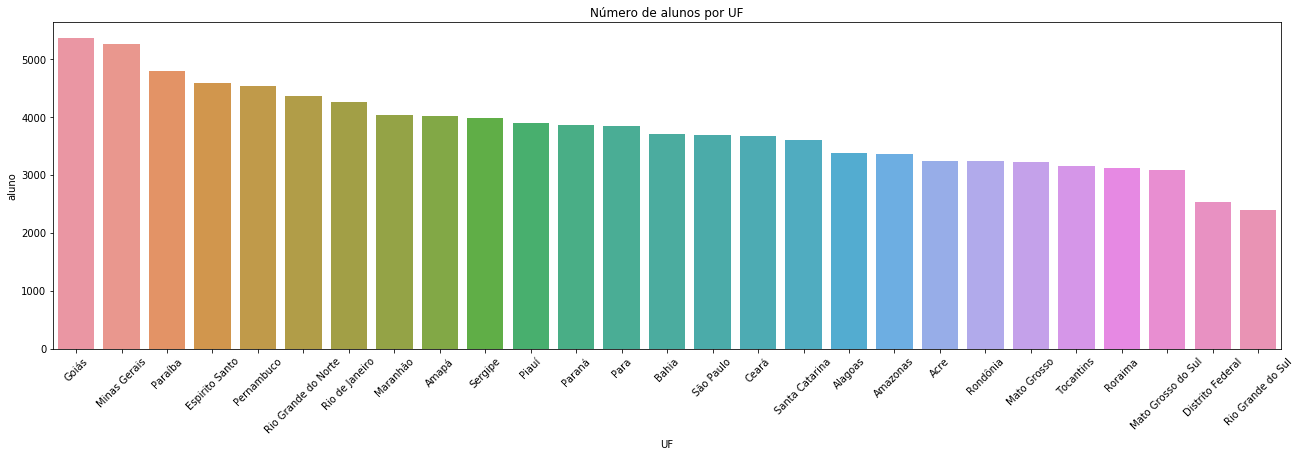

In [0]:
plt.figure(figsize = (22,6))
sns.barplot(x = 'UF'
            , y = 'aluno'
            , data= eda.groupby('UF')['aluno'].count().reset_index().sort_values(by='aluno',ascending= False))
plt.title('Número de alunos por UF')
plt.xticks(rotation = 45)
plt.show()

In [0]:
pizza(eda,'Capital')

In [0]:
grgs = eda.groupby(['Cor_Raca','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Cor_Raca", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

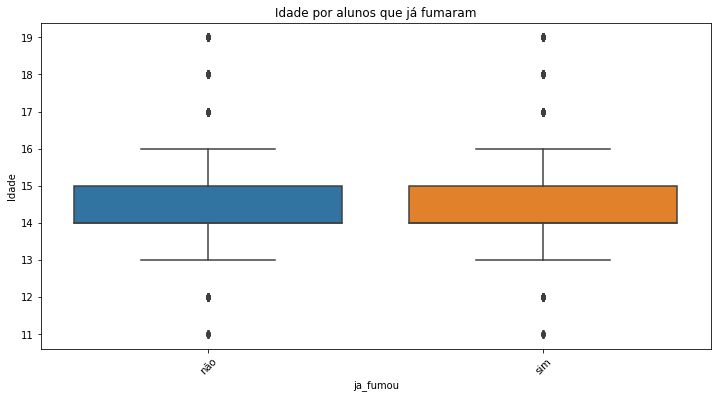

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='Idade'
            , data = eda
           ) 
plt.title('Idade por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

##### Dados habitacionais/familiares (Aluno mora com a mãe? pai? trabalha?tem telefone? Carro? Moto?

- Grande Percentual dos alunos moram com o Pai (62,4%) ou com a Mãe (88.7%)
- A distribuição de número de pessoas que moram com estudantes que fumam ou nunca fumaram tem um comportamento semelhante
- Percentual relevante dos alunos possui acesso a internet (76.9%) a um percentuaal relevante possui computador em casa (68.5%)

In [0]:
pizza(eda,'Mora_Pai')

In [0]:
pizza(eda,'Mora_Mae')

In [0]:
grgs = eda.groupby(['Ensino_Mae','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Ensino_Mae", y="aluno", color='ja_fumou', barmode='stack')
fig.show()


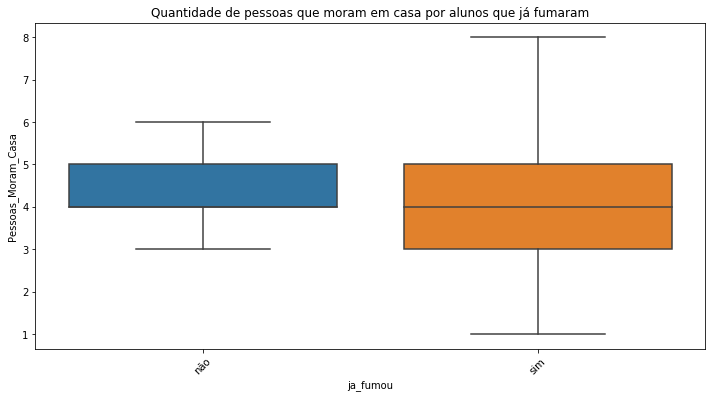

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='Pessoas_Moram_Casa'
            , data = eda
           ,showfliers=False) 
plt.title('Quantidade de pessoas que moram em casa por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

In [0]:
pizza(eda,'Trabalho_Atualmente')

In [0]:
pizza(eda,'Telefone_Fixo')

In [0]:
pizza(eda,'Computador')

In [0]:
pizza(eda,'Acesso_Internet')

In [0]:
pizza(eda,'Carro_Casa')

In [0]:
pizza(eda,'Moto_Casa')

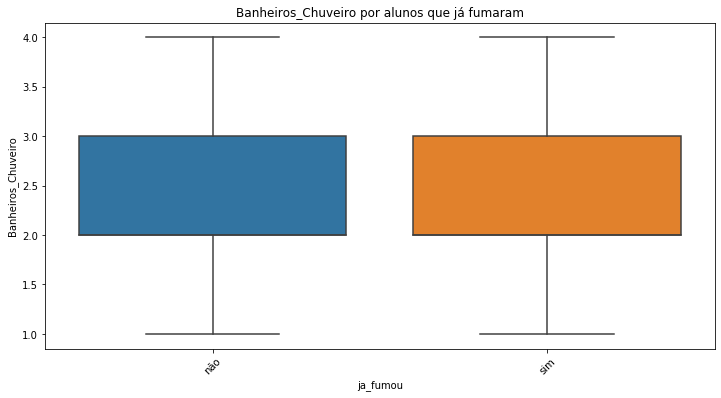

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='Banheiros_Chuveiro'
            , data = eda
           ,showfliers=False) 
plt.title('Banheiros_Chuveiro por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

In [0]:
pizza(eda,'Tem_Empregado_Domestico')

In [0]:
grgs = eda.groupby(['Serie_estuda','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Serie_estuda", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Turno_estuda','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Turno_estuda", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'Estuda_Regime_Integral')

In [0]:
pizza(eda,'Estuda_Regime_Internato')

In [0]:
grgs = eda.groupby(['Pretensao_Grau_Escolaridade','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Pretensao_Grau_Escolaridade", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Iniciar_Apos_Ciclo_Atual_Estudos','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Iniciar_Apos_Ciclo_Atual_Estudos", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

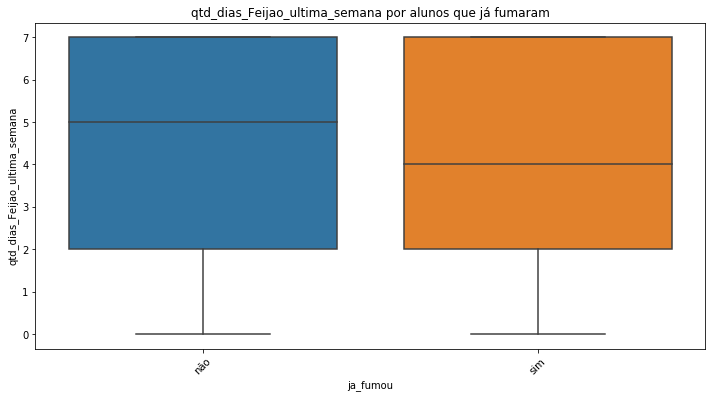

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Feijao_ultima_semana'
            , data = eda
           ) 
plt.title('qtd_dias_Feijao_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

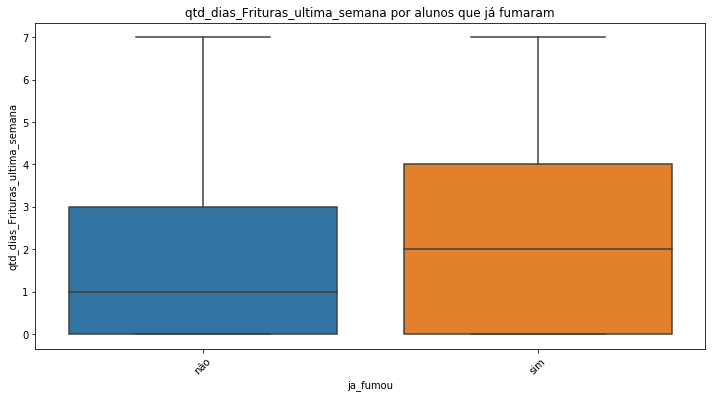

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Frituras_ultima_semana'	
            , data = eda
           ,showfliers=False) 
plt.title('qtd_dias_Frituras_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

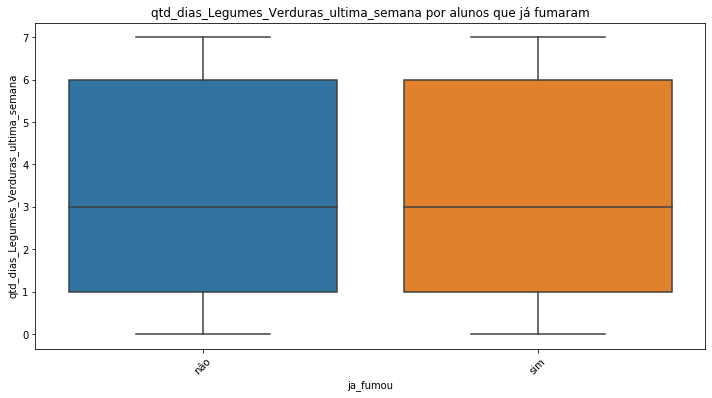

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Legumes_Verduras_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Legumes_Verduras_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

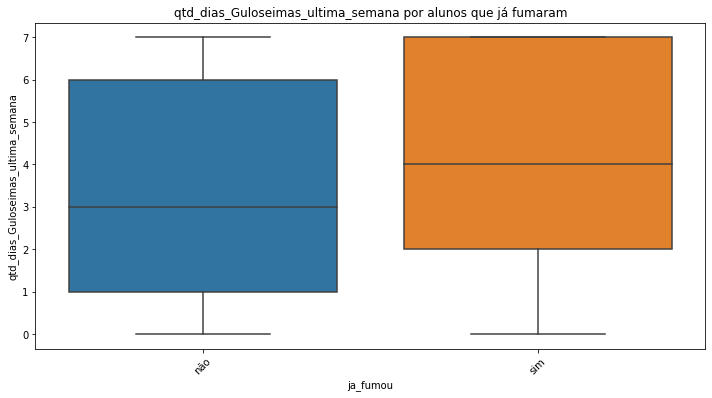

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Guloseimas_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Guloseimas_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

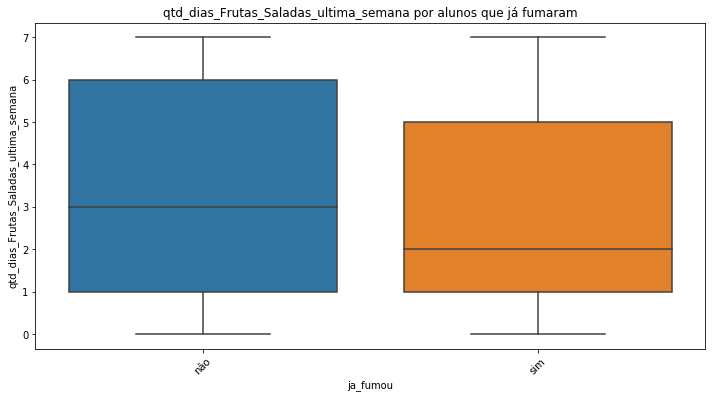

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Frutas_Saladas_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Frutas_Saladas_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

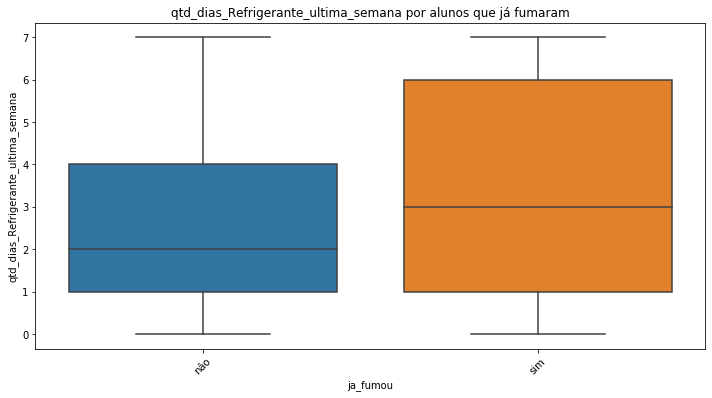

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Refrigerante_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Refrigerante_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = eda.groupby(['Janta_Com_Pais','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Janta_Com_Pais", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Come_Assistindo','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Come_Assistindo", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Toma_Café','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Toma_Café", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

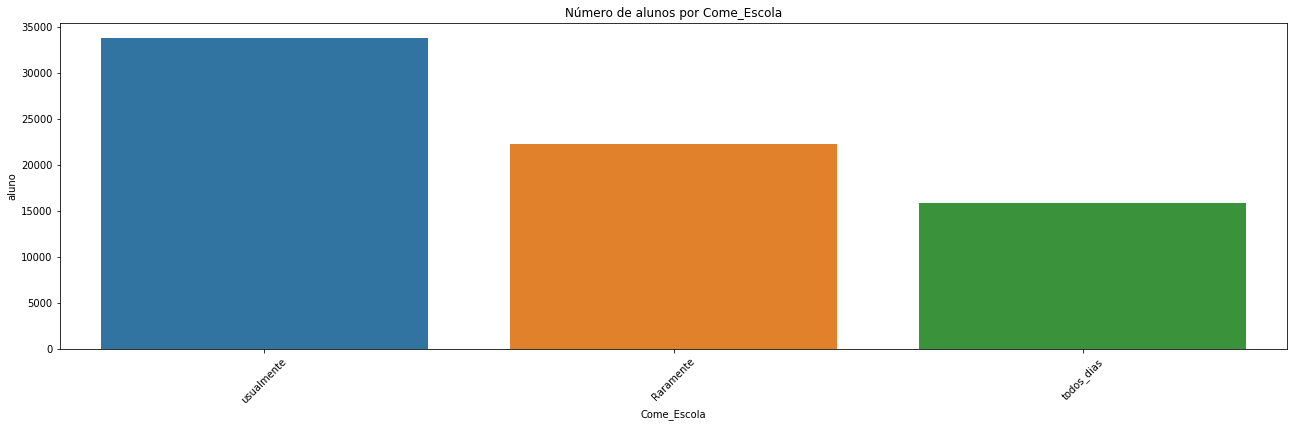

In [0]:
plt.figure(figsize = (22,6))
sns.barplot(x = 'Come_Escola'
            , y = 'aluno'
            , data= eda.groupby('Come_Escola')['aluno'].count().reset_index().sort_values(by='aluno',ascending= False))
plt.title('Número de alunos por Come_Escola')
plt.xticks(rotation = 45)
plt.show()

In [0]:
pizza(eda,'Escola_Oferece_Comida')

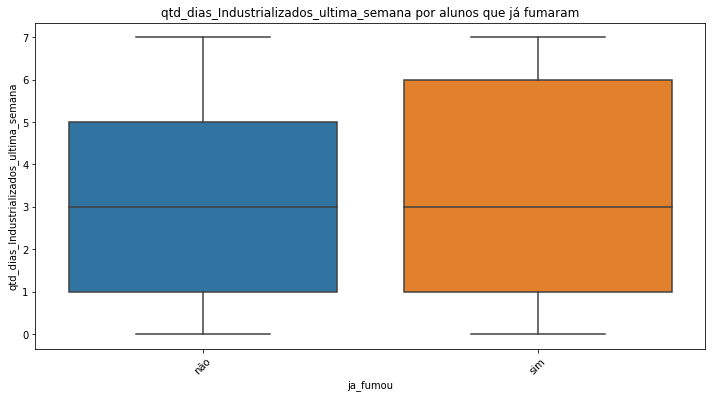

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Industrializados_ultima_semana'	
            , data = eda
           ,showfliers=False) 
plt.title('qtd_dias_Industrializados_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

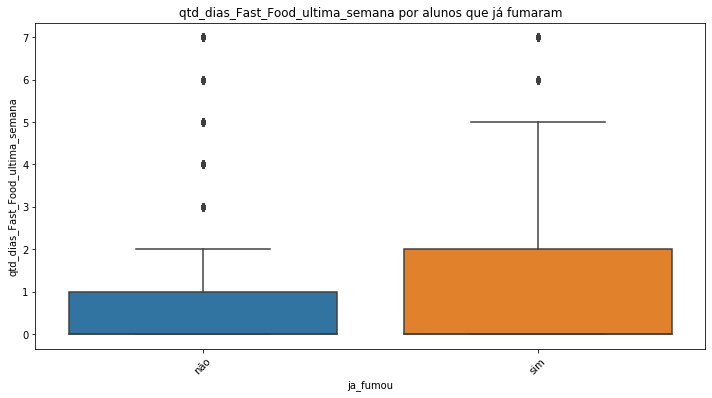

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Fast_Food_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Fast_Food_ultima_semana por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

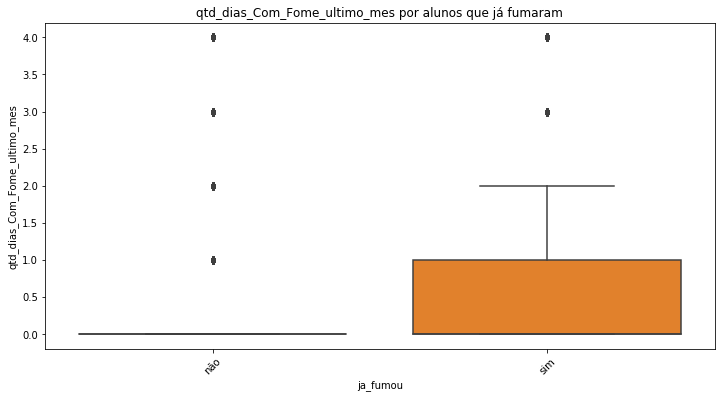

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Com_Fome_ultimo_mes'	
            , data = eda
           ) 
plt.title('qtd_dias_Com_Fome_ultimo_mes por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

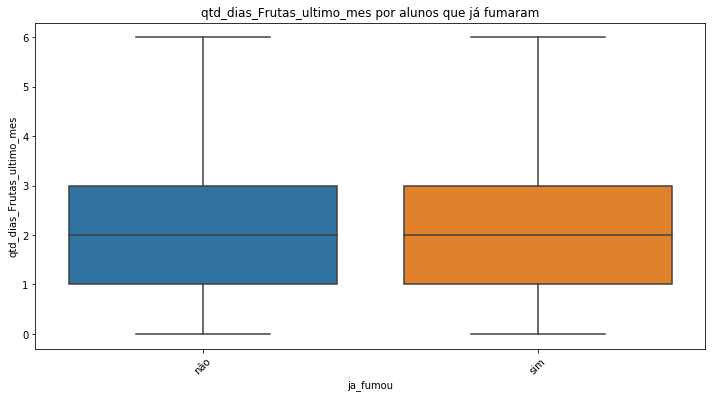

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Frutas_ultimo_mes'	
            , data = eda
           ) 
plt.title('qtd_dias_Frutas_ultimo_mes por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

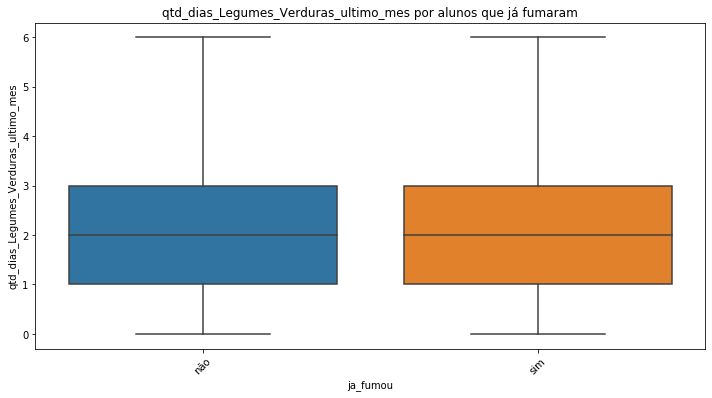

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Legumes_Verduras_ultimo_mes'	
            , data = eda
           ) 
plt.title('qtd_dias_Legumes_Verduras_ultimo_mes por alunos que já fumaram')
plt.xticks(rotation = 45)
plt.show()

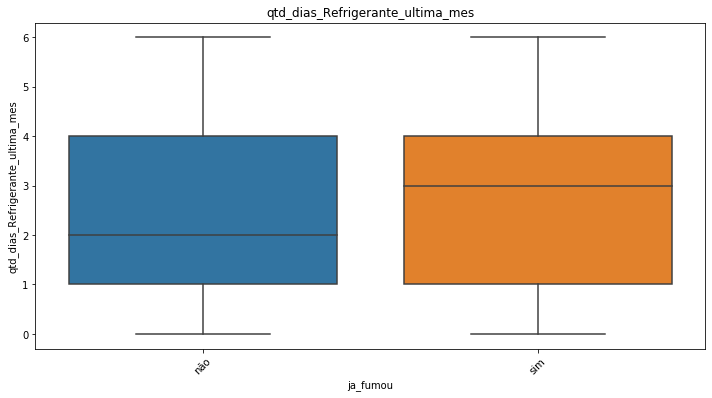

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Refrigerante_ultima_mes'	
            , data = eda
           ) 
plt.title('qtd_dias_Refrigerante_ultima_mes')
plt.xticks(rotation = 45)
plt.show()

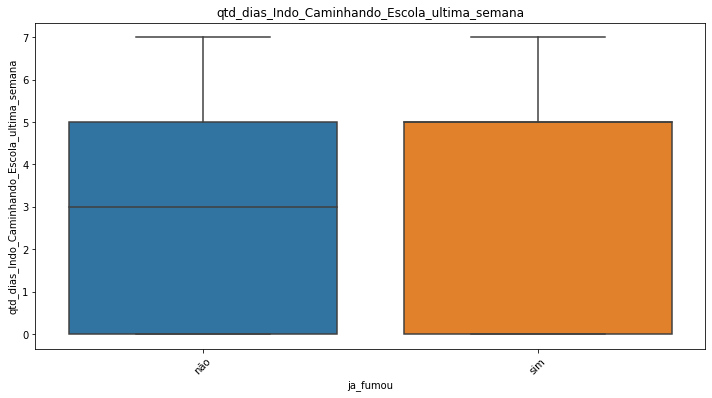

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Indo_Caminhando_Escola_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Indo_Caminhando_Escola_ultima_semana')
plt.xticks(rotation = 45)
plt.show()

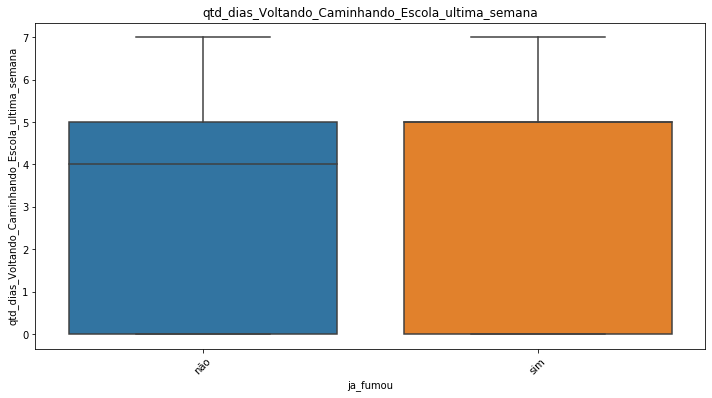

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Voltando_Caminhando_Escola_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Voltando_Caminhando_Escola_ultima_semana')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = eda.groupby(['tempo_Indo_Caminhando_Escola','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="tempo_Indo_Caminhando_Escola", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['tempo_Voltando_Caminhando_Escola','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="tempo_Voltando_Caminhando_Escola", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

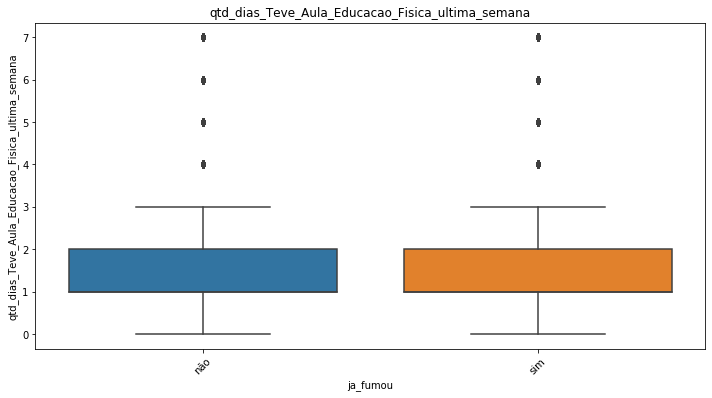

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana')
plt.xticks(rotation = 45)
plt.show()

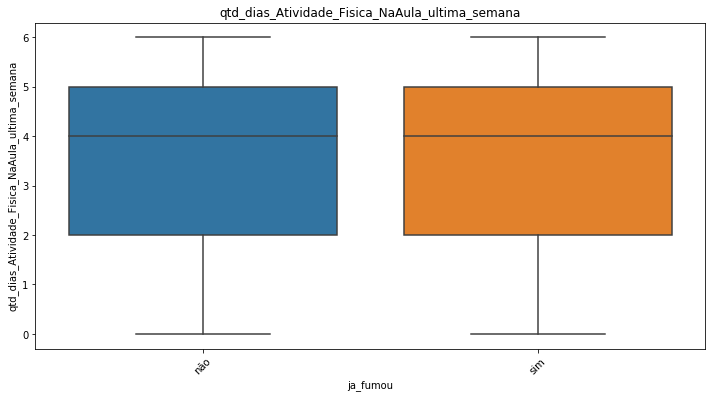

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Atividade_Fisica_NaAula_ultima_semana'	
            , data = eda
           ) 
plt.title('qtd_dias_Atividade_Fisica_NaAula_ultima_semana')
plt.xticks(rotation = 45)
plt.show()

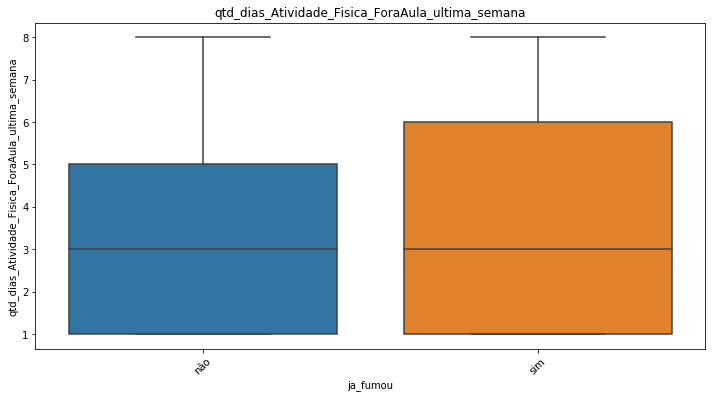

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Atividade_Fisica_ForaAula_ultima_semana'	
            , data = eda
           ,showfliers=False) 
plt.title('qtd_dias_Atividade_Fisica_ForaAula_ultima_semana')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = eda.groupby(['tempo_por_dia_Atividade_Fisica_ForaAula','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="tempo_por_dia_Atividade_Fisica_ForaAula", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Pretensao_Atividade_Fisica_ultima_semana','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Pretensao_Atividade_Fisica_ultima_semana", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

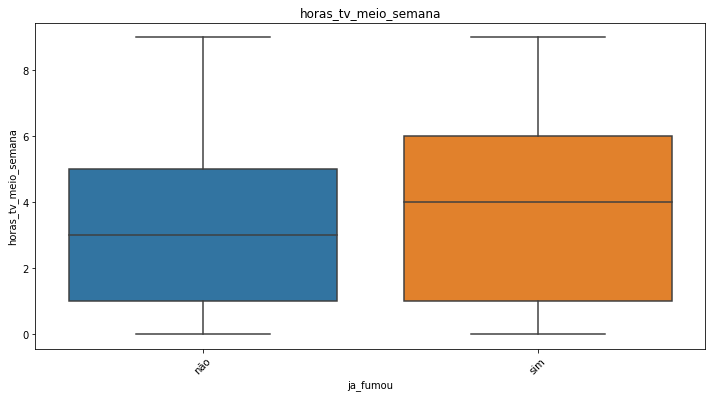

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='horas_tv_meio_semana'	
            , data = eda
           ) 
plt.title('horas_tv_meio_semana')
plt.xticks(rotation = 45)
plt.show()

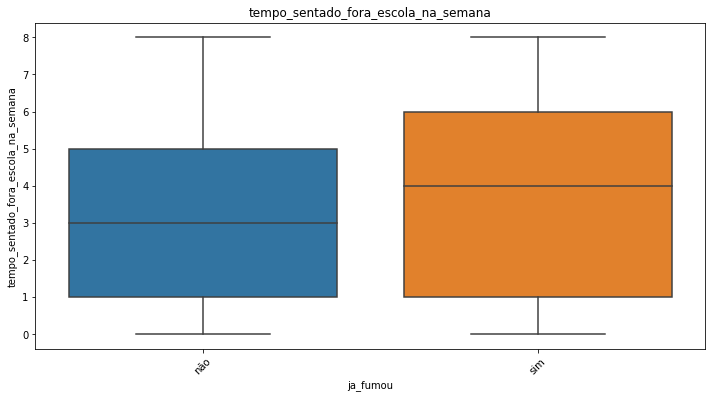

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='tempo_sentado_fora_escola_na_semana'	
            , data = eda
           ) 
plt.title('tempo_sentado_fora_escola_na_semana')
plt.xticks(rotation = 45)
plt.show()

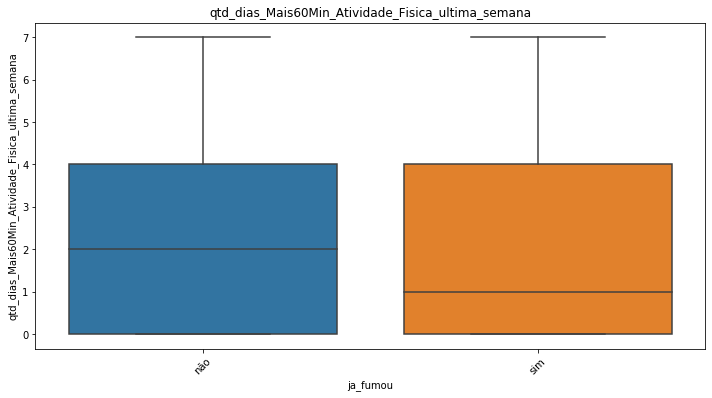

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana'	
            , data = eda
           ,showfliers=False) 
plt.title('qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana')
plt.xticks(rotation = 45)
plt.show()

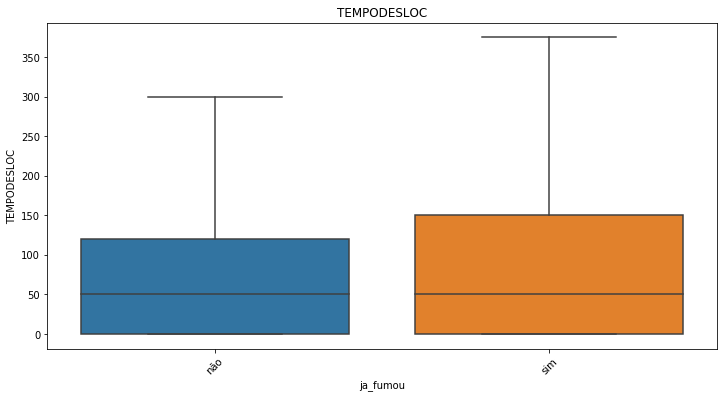

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='TEMPODESLOC'	
            , data = eda
           ,showfliers=False) 
plt.title('TEMPODESLOC')
plt.xticks(rotation = 45)
plt.show()

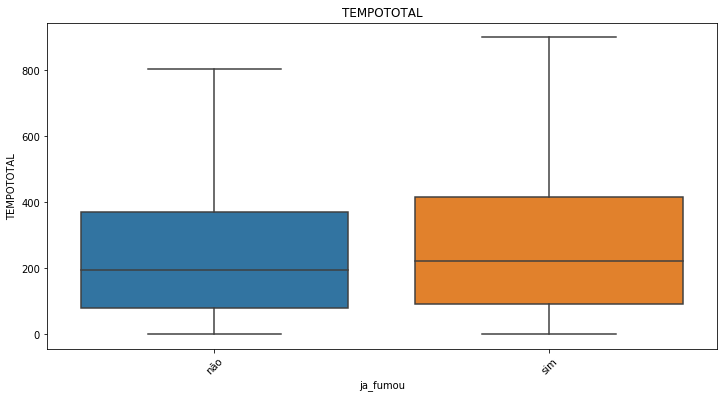

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='TEMPOTOTAL'	
            , data = eda
           ,showfliers=False) 
plt.title('TEMPOTOTAL')
plt.xticks(rotation = 45)
plt.show()

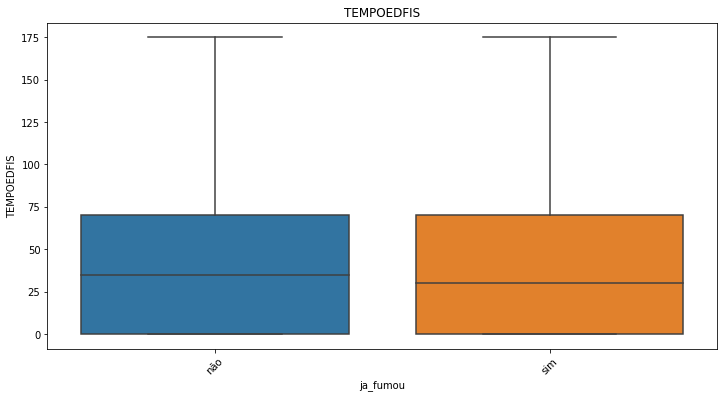

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='TEMPOEDFIS'	
            , data = eda
           ,showfliers=False) 
plt.title('TEMPOEDFIS')
plt.xticks(rotation = 45)
plt.show()

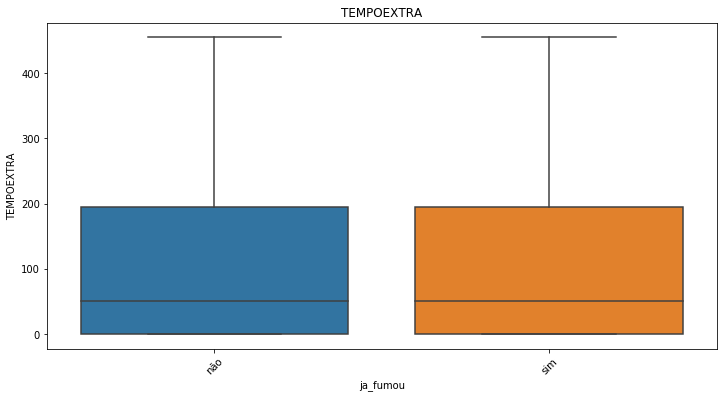

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='TEMPOEXTRA'	
            , data = eda
           ,showfliers=False) 
plt.title('TEMPOEXTRA')
plt.xticks(rotation = 45)
plt.show()

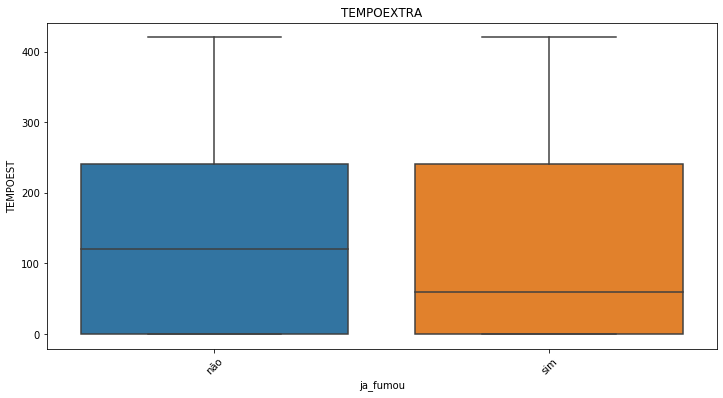

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='TEMPOEST'	
            , data = eda
           ,showfliers=False) 
plt.title('TEMPOEXTRA')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = eda.groupby(['qtd_dias_fumaramAoRedor_ultima_semana','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_fumaramAoRedor_ultima_semana", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Pais_Responsaveis_Fumam','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Pais_Responsaveis_Fumam", y="aluno", color='ja_fumou', barmode='stack',title='Distribuição do consumo de cigarro entre os responsáveis')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_tabaco_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_tabaco_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'ja_bebeu')

In [0]:
eda['ja_bebeu'] = eda['ja_bebeu'].map(eda_sim_nao)
grgs = eda.groupby(['ja_bebeu','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="ja_bebeu", y="aluno", color='ja_fumou', barmode='stack',title="Quantidade de alunos que já experimentaram bebida ")
fig.show()

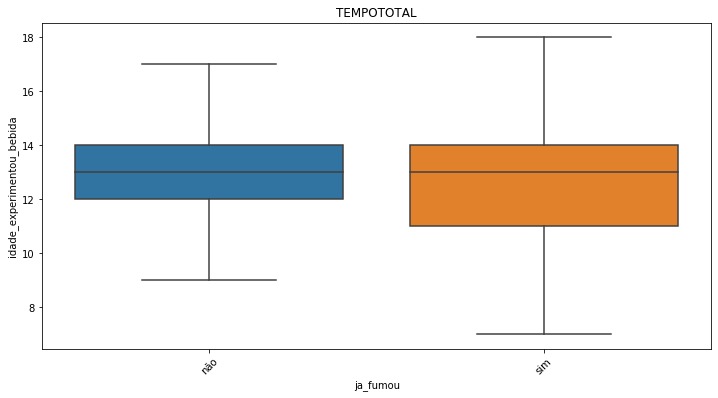

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='idade_experimentou_bebida'	
            , data = eda
           ,showfliers=False) 
plt.title('TEMPOTOTAL')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = eda.groupby(['qtd_dias_bebida_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_bebida_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['doses_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="doses_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['Como_Conseguiu_Bebida_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Como_Conseguiu_Bebida_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_embriaguez_na_vida','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_embriaguez_na_vida", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_brigas_por_bebida','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_brigas_por_bebida", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_amigos_que_bebem','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_amigos_que_bebem", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_amigos_que_drogas','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_amigos_que_drogas", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_falta_sem_permisao_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_falta_sem_permisao_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_Pais_Verificaram_Deveres_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_Pais_Verificaram_Deveres_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack',title='Quantidade de dias que os Responsáveis verificaram os deveres escolares dos estudantes')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_colegas_prestativos_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_colegas_prestativos_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_ofensas_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_ofensas_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'ofendeu_Pessoas_ultimo_mes')

In [0]:
pizza(eda,'Ja_Sofreu_Bullying')

In [0]:
pizza(eda,'Ja_Teve_Relacao_Sexual')

In [0]:
grgs = eda.groupby(['Ja_Teve_Relacao_Sexual','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="Ja_Teve_Relacao_Sexual", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'Recebeu_Orientacao_DSTS')

In [0]:
pizza(eda,'Recebeu_Orientacao_CamisinhaGratuita')

In [0]:
pizza(eda,'envolvimento_briga_alguem_armado_ultimo_mes')

In [0]:
pizza(eda,'envolvimento_briga_alguem_armaBranca_ultimo_mes')

In [0]:
grgs = eda.groupby(['frequencia_cinto_seguranca_bancoFrente_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_cinto_seguranca_bancoFrente_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_cinto_seguranca_bancoTras_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_cinto_seguranca_bancoTras_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_capacete_moto_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_capacete_moto_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_dirigiu_veiculo_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_dirigiu_veiculo_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_veiculo_motorista_alcoolizado','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_veiculo_motorista_alcoolizado", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['agressao_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="agressao_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['brigas_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="brigas_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['ferido_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="ferido_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['ferimento_mais_serio_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="ferimento_mais_serio_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'acidente_bike_ultimo_ano')

In [0]:
pizza(eda,'forcado_relacao_sexual')

In [0]:
grgs = eda.groupby(['qtd_vezes_dia_escovacao_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_vezes_dia_escovacao_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'dor_dente_ultimo_semestre')

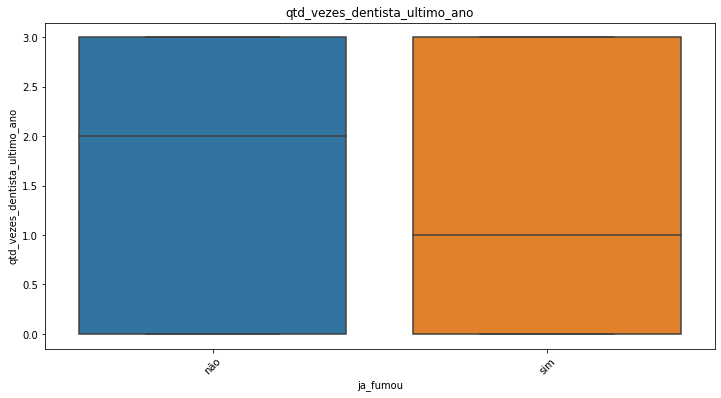

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_vezes_dentista_ultimo_ano'	
            , data = eda
           ,showfliers=False) 
plt.title('qtd_vezes_dentista_ultimo_ano')
plt.xticks(rotation = 45)
plt.show()

In [0]:
grgs = eda.groupby(['frequencia_lavar_maos_antesComer_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_lavar_maos_antesComer_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_lavar_maos_DpsBanheiro_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_lavar_maos_DpsBanheiro_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_Sabonete_lavar_Maos_ultimo_mes','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_Sabonete_lavar_Maos_ultimo_mes", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['relacao_corpo_considera','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="relacao_corpo_considera", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['oq_fazendo_ao_peso','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="oq_fazendo_ao_peso", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'vomitou_ou_laxantes_perderPeso_ultimo_mes')

In [0]:
pizza(eda,'remedio_perder_peso_ultimo_mes')

In [0]:
pizza(eda,'remedio_ganhar_peso_ultimo_mes')

In [0]:
grgs = eda.groupby(['imagem_corporal','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="imagem_corporal", y="aluno", color='ja_fumou', barmode='stack',title='Qual a relação do aluno com a sua imagem corporal')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_solidao_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_solidao_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['frequencia_dificuldade_dormir_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="frequencia_dificuldade_dormir_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

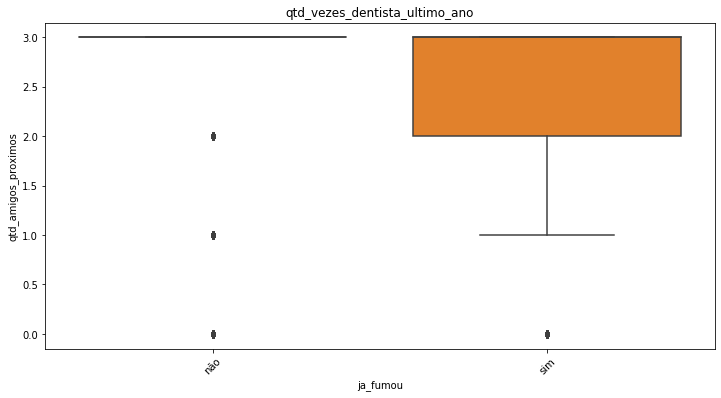

In [0]:
plt.figure(figsize = (12,6))
sns.boxplot(x='ja_fumou'
            , y='qtd_amigos_proximos'	
            , data = eda
           ) 
plt.title('qtd_vezes_dentista_ultimo_ano')
plt.xticks(rotation = 45)
plt.show()

In [0]:
pizza(eda,'procurou_servico_saude_ultimo_ano')

In [0]:
grgs = eda.groupby(['qual_servico_saude_mais_frequente_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qual_servico_saude_mais_frequente_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'foi_atendido_ubs_ultima_procura')

In [0]:
grgs = eda.groupby(['classificacao_estado_saude','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="classificacao_estado_saude", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['qtd_dias_faltou_escola_saude_ultimo_ano','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="qtd_dias_faltou_escola_saude_ultimo_ano", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
grgs = eda.groupby(['motivo_ubs_ultima_vez','ja_fumou'])['aluno'].count().reset_index()
fig = px.bar(grgs, x="motivo_ubs_ultima_vez", y="aluno", color='ja_fumou', barmode='stack')
fig.show()

In [0]:
pizza(eda,'ouviu_falar_vacinacao_HPV')

In [0]:
pizza(eda,'vacinado_hpv')

In [0]:
pizza(eda,'chiado_peito_ultimo_ano')

In [0]:
pizza(eda,'teve_asma')

In [0]:
#gráfico
dados= df.groupby('ja_fumou')['aluno'].count().reset_index()

fig = px.pie(dados,
             values="aluno",
             names="ja_fumou",
             template="seaborn")
fig.update_traces(rotation=90
                  , pull=0.05
                  , textinfo="percent+label")
fig.show()

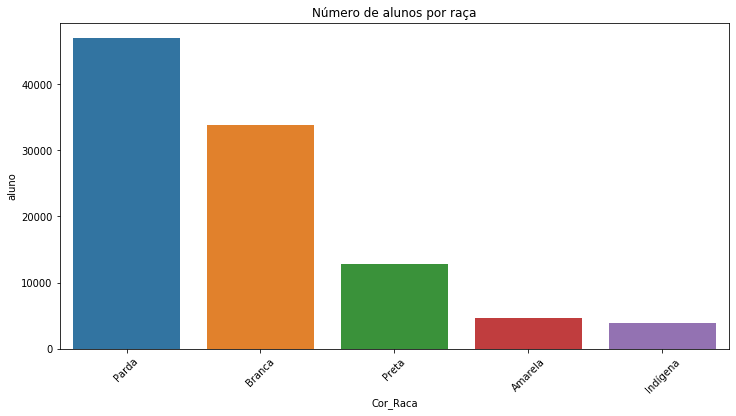

In [0]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Cor_Raca'
            , y = 'aluno'
            , data= df.groupby('Cor_Raca')['aluno'].count().reset_index().sort_values(by='aluno',ascending= False))
plt.title('Número de alunos por raça')
plt.xticks(rotation = 45)
plt.show()

In [0]:
tab_aux = df.groupby('Cor_Raca')['aluno'].count().reset_index().sort_values(by='aluno',ascending= False)
tab_aux['%'] = tab_aux['aluno']/len(df)*100
tab_aux

,Cor_Raca,aluno,%
3,Parda,46935,45.982248
1,Branca,33775,33.089388
4,Preta,12849,12.588173
0,Amarela,4580,4.487029
2,Indígena,3825,3.747355


In [0]:
colunas = ['UF','']
df = df.drop(columns = 'UF',axis=1)

In [0]:
df.head()

,Regiao_Geografica,Capital,Sexo,Cor_Raca,Idade,Mes_Nascimento,Ano_Nascimento,Mora_Mae,Mora_Pai,Ensino_Mae,Pessoas_Moram_Casa,Trabalho_Atualmente,Telefone_Fixo,Computador,Acesso_Internet,Carro_Casa,Moto_Casa,Banheiros_Chuveiro,Tem_Empregado_Domestico,Serie_estuda,Turno_estuda,Estuda_Regime_Integral,Estuda_Regime_Internato,Pretensao_Grau_Escolaridade,Iniciar_Apos_Ciclo_Atual_Estudos,qtd_dias_Feijao_ultima_semana,qtd_dias_Frituras_ultima_semana,qtd_dias_Legumes_Verduras_ultima_semana,qtd_dias_Guloseimas_ultima_semana,qtd_dias_Frutas_Saladas_ultima_semana,qtd_dias_Refrigerante_ultima_semana,Janta_Com_Pais,Come_Assistindo,Toma_Café,Come_Escola,Escola_Oferece_Comida,qtd_dias_Industrializados_ultima_semana,qtd_dias_Fast_Food_ultima_semana,qtd_dias_Com_Fome_ultimo_mes,qtd_dias_Frutas_ultimo_mes,qtd_dias_Legumes_Verduras_ultimo_mes,qtd_dias_Refrigerante_ultima_mes,qtd_dias_Indo_Caminhando_Escola_ultima_semana,qtd_dias_Voltando_Caminhando_Escola_ultima_semana,tempo_Indo_Caminhando_Escola,tempo_Voltando_Caminhando_Escola,qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana,qtd_dias_Atividade_Fisica_NaAula_ultima_semana,qtd_dias_Atividade_Fisica_ForaAula_ultima_semana,tempo_por_dia_Atividade_Fisica_ForaAula,Pretensao_Atividade_Fisica_ultima_semana,horas_tv_meio_semana,tempo_sentado_fora_escola_na_semana,qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,ja_fumou,qtd_dias_fumaramAoRedor_ultima_semana,Pais_Responsaveis_Fumam,qtd_dias_tabaco_ultimo_mes,ja_bebeu,idade_experimentou_bebida,qtd_dias_bebida_ultimo_mes,doses_ultimo_mes,Como_Conseguiu_Bebida_ultimo_mes,qtd_embriaguez_na_vida,qtd_brigas_por_bebida,qtd_amigos_que_bebem,ja_usou_droga,qtd_amigos_que_drogas,qtd_dias_falta_sem_permisao_ultimo_mes,qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes,qtd_dias_Pais_Verificaram_Deveres_ultimo_mes,qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes,qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes,qtd_dias_colegas_prestativos_ultimo_mes,frequencia_ofensas_ultimo_mes,ofendeu_Pessoas_ultimo_mes,Ja_Sofreu_Bullying,Ja_Teve_Relacao_Sexual,Recebeu_Orientacao_Gravidez,Recebeu_Orientacao_DSTS,Recebeu_Orientacao_CamisinhaGratuita,qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes,qtd_dias_faltou_inseguranca_Escola_ultimo_mes,qtd_agressoes_adulto_familia_ultimo_mes,envolvimento_briga_alguem_armado_ultimo_mes,envolvimento_briga_alguem_armaBranca_ultimo_mes,frequencia_cinto_seguranca_bancoFrente_ultimo_mes,frequencia_cinto_seguranca_bancoTras_ultimo_mes,frequencia_capacete_moto_ultimo_mes,frequencia_dirigiu_veiculo_ultimo_mes,frequencia_veiculo_motorista_alcoolizado,agressao_ultimo_ano,brigas_ultimo_ano,ferido_ultimo_ano,ferimento_mais_serio_ultimo_ano,acidente_bike_ultimo_ano,forcado_relacao_sexual,qtd_vezes_dia_escovacao_ultimo_mes,dor_dente_ultimo_semestre,qtd_vezes_dentista_ultimo_ano,frequencia_lavar_maos_antesComer_ultimo_mes,frequencia_lavar_maos_DpsBanheiro_ultimo_mes,frequencia_Sabonete_lavar_Maos_ultimo_mes,relacao_corpo_considera,oq_fazendo_ao_peso,vomitou_ou_laxantes_perderPeso_ultimo_mes,remedio_perder_peso_ultimo_mes,remedio_ganhar_peso_ultimo_mes,imagem_corporal,sentimento_ao_corpo_atual,frequencia_solidao_ultimo_ano,frequencia_dificuldade_dormir_ultimo_ano,qtd_amigos_proximos,procurou_servico_saude_ultimo_ano,qual_servico_saude_mais_frequente_ultimo_ano,foi_atendido_ubs_ultima_procura,classificacao_estado_saude,qtd_dias_faltou_escola_saude_ultimo_ano,motivo_ubs_ultima_vez,ouviu_falar_vacinacao_HPV,vacinado_hpv,chiado_peito_ultimo_ano,teve_asma,aluno
0,Norte,1,Feminino,Branca,14,2,2001.0,1.0,0.0,superior,4,0.0,1.0,1.0,1.0,1.0,0.0,4,1.0,9_ano,Manhã,0.0,0.0,ensino_superior,estudar_trabalhar,2.0,3.0,4.0,7.0,1.0,4.0,usualmente,usualmente,Raramente,NaN,0.0,7.0,1.0,0.0,1.0,2.0,2.0,1.0,5.0,Menos de 10 minutos por dia,Menos de 10 minutos por dia,1.0,NaN,1,NaN,faria_atividade,1.0,3.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,Nenhum dia nos últimos 7 dias (0 dia),ngm_fuma,Nenhum dia nos últimos 30 dias 

In [0]:
from sklearn.preprocessing import OneHotEncoder

colunas_binarizar = ['Regiao_Geografica',
 'Sexo',
 'Cor_Raca',
 'Ensino_Mae',
 'Serie_estuda',
 'Turno_estuda',
 'Pretensao_Grau_Escolaridade',
 'Iniciar_Apos_Ciclo_Atual_Estudos',
 'Janta_Com_Pais',
 'Come_Assistindo',
 'Toma_Café',
 'Come_Escola',
 'tempo_Indo_Caminhando_Escola',
 'tempo_Voltando_Caminhando_Escola',
 'tempo_por_dia_Atividade_Fisica_ForaAula',
 'Pretensao_Atividade_Fisica_ultima_semana',
 'qtd_dias_fumaramAoRedor_ultima_semana',
 'Pais_Responsaveis_Fumam',
 'qtd_dias_tabaco_ultimo_mes',
 'qtd_dias_bebida_ultimo_mes',
 #'doses_ultimo_mes',
 'Como_Conseguiu_Bebida_ultimo_mes',
 'qtd_embriaguez_na_vida',
 'qtd_brigas_por_bebida',
 'qtd_amigos_que_bebem',
 'qtd_amigos_que_drogas',
 'qtd_dias_falta_sem_permisao_ultimo_mes',
 'qtd_dias_Pais_SabiamOqFaziam_TempoLivre_ultimo_mes',
 'qtd_dias_Pais_Verificaram_Deveres_ultimo_mes',
 'qtd_dias_Pais_Entenderam_Preocupacoes_ultimo_mes',
 'qtd_dias_Pais_Mexeram_SuasCoisas_SemSuaConcordancia_ultimo_mes',
 'qtd_dias_colegas_prestativos_ultimo_mes',
 'frequencia_ofensas_ultimo_mes',
 'qtd_dias_faltou_inseguranca_caminhoEscola_ultimo_mes',
 'qtd_dias_faltou_inseguranca_Escola_ultimo_mes',
 'qtd_agressoes_adulto_familia_ultimo_mes',
 'frequencia_cinto_seguranca_bancoFrente_ultimo_mes',
 'frequencia_cinto_seguranca_bancoTras_ultimo_mes',
 'frequencia_capacete_moto_ultimo_mes',
 'frequencia_dirigiu_veiculo_ultimo_mes',
 'frequencia_veiculo_motorista_alcoolizado',
 'agressao_ultimo_ano',
 'brigas_ultimo_ano',
 'ferido_ultimo_ano',
 'ferimento_mais_serio_ultimo_ano',
 'qtd_vezes_dia_escovacao_ultimo_mes',
 'frequencia_lavar_maos_antesComer_ultimo_mes',
 'frequencia_lavar_maos_DpsBanheiro_ultimo_mes',
 'frequencia_Sabonete_lavar_Maos_ultimo_mes',
 'relacao_corpo_considera',
 'oq_fazendo_ao_peso',
 'imagem_corporal',
 'sentimento_ao_corpo_atual',
 'frequencia_solidao_ultimo_ano',
 'frequencia_dificuldade_dormir_ultimo_ano',
 'qual_servico_saude_mais_frequente_ultimo_ano',
 'classificacao_estado_saude',
 'qtd_dias_faltou_escola_saude_ultimo_ano',
 'motivo_ubs_ultima_vez',
 'doses_ultimo_mes']

df_dummies = pd.get_dummies(df,
                      columns= colunas_binarizar,
                       prefix_sep= ' ')

print('Visualizando o dataframe após realização do OneHotEncoder')

df_dummies.head()

,Capital,Idade,Mes_Nascimento,Ano_Nascimento,Mora_Mae,Mora_Pai,Pessoas_Moram_Casa,Trabalho_Atualmente,Telefone_Fixo,Computador,Acesso_Internet,Carro_Casa,Moto_Casa,Banheiros_Chuveiro,Tem_Empregado_Domestico,Estuda_Regime_Integral,Estuda_Regime_Internato,qtd_dias_Feijao_ultima_semana,qtd_dias_Frituras_ultima_semana,qtd_dias_Legumes_Verduras_ultima_semana,qtd_dias_Guloseimas_ultima_semana,qtd_dias_Frutas_Saladas_ultima_semana,qtd_dias_Refrigerante_ultima_semana,Escola_Oferece_Comida,qtd_dias_Industrializados_ultima_semana,qtd_dias_Fast_Food_ultima_semana,qtd_dias_Com_Fome_ultimo_mes,qtd_dias_Frutas_ultimo_mes,qtd_dias_Legumes_Verduras_ultimo_mes,qtd_dias_Refrigerante_ultima_mes,qtd_dias_Indo_Caminhando_Escola_ultima_semana,qtd_dias_Voltando_Caminhando_Escola_ultima_semana,qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana,qtd_dias_Atividade_Fisica_NaAula_ultima_semana,qtd_dias_Atividade_Fisica_ForaAula_ultima_semana,horas_tv_meio_semana,tempo_sentado_fora_escola_na_semana,qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,ja_fumou,ja_bebeu,idade_experimentou_bebida,ja_usou_droga,ofendeu_Pessoas_ultimo_mes,Ja_Sofreu_Bullying,Ja_Teve_Relacao_Sexual,Recebeu_Orientacao_Gravidez,Recebeu_Orientacao_DSTS,Recebeu_Orientacao_CamisinhaGratuita,envolvimento_briga_alguem_armado_ultimo_mes,envolvimento_briga_alguem_armaBranca_ultimo_mes,acidente_bike_ultimo_ano,forcado_relacao_sexual,dor_dente_ultimo_semestre,qtd_vezes_dentista_ultimo_ano,vomitou_ou_laxantes_perderPeso_ultimo_mes,remedio_perder_peso_ultimo_mes,remedio_ganhar_peso_ultimo_mes,qtd_amigos_proximos,procurou_servico_saude_ultimo_ano,foi_atendido_ubs_ultima_procura,ouviu_falar_vacinacao_HPV,vacinado_hpv,chiado_peito_ultimo_ano,teve_asma,aluno,Regiao_Geografica Centro-Oeste,Regiao_Geografica Nordeste,Regiao_Geografica Norte,Regiao_Geografica Sudeste,Regiao_Geografica Sul,Sexo Feminino,Sexo Masculino,Cor_Raca Amarela,Cor_Raca Branca,Cor_Raca Indígena,Cor_Raca Parda,Cor_Raca Preta,Ensino_Mae Não sei,Ensino_Mae ensino_fundamental,Ensino_Mae ensino_medio,Ensino_Mae nao_estudou,Ensino_Mae superior,Serie_estuda 1_ano_EM,Serie_estuda 2_ano_EM,Serie_estuda 3_ano_EM,Serie_estuda 6_ano,Serie_estuda 7_ano,Serie_estuda 8_ano,Serie_estuda 9_ano,Turno_estuda Integral,Turno_estuda Intermediário,Turno_estuda Manhã,Turno_estuda Noite,Turno_estuda Tarde,Pretensao_Grau_Escolaridade ensino_fundamental,Pretensao_Grau_Escolaridade ensino_medio,Pretensao_Grau_Escolaridade ensino_superior,Iniciar_Apos_Ciclo_Atual_Estudos estudar,Iniciar_Apos_Ciclo_Atual_Estudos estudar_trabalhar,Iniciar_Apos_Ciclo_Atual_Estudos outros,Iniciar_Apos_Ciclo_Atual_Estudos trabalhar,Janta_Com_Pais Não,Janta_Com_Pais Raramente,Janta_Com_Pais todos_dias,Janta_Com_Pais usualmente,Come_Assistindo Não,Come_Assistindo Raramente,Come_Assistindo todos_dias,Come_Assistindo usualmente,Toma_Café Não,Toma_Café Raramente,Toma_Café todos_dias,Toma_Café usualmente,Come_Escola Raramente,Come_Escola todos_dias,Come_Escola usualmente,tempo_Indo_Caminhando_Escola 1 hora ou mais por dia,tempo_Indo_Caminhando_Escola 10 a 19 minutos por dia,tempo_Indo_Caminhando_Escola 20 a 29 minutos por dia,tempo_Indo_Caminhando_Escola 30 a 39 minutos por dia,tempo_Indo_Caminhando_Escola 40 a 49 minutos por dia,tempo_Indo_Caminhando_Escola 50 a 59 minutos por dia,tempo_Indo_Caminhando_Escola Menos de 10 minutos por dia,tempo_Voltando_Caminhando_Escola 1 hora ou mais por dia,tempo_Voltando_Caminhando_Escola 10 a 19 minutos por dia,tempo_Voltando_Caminhando_Escola 20 a 29 minutos por dia,tempo_Voltando_Caminhando_Escola 30 a 39 minutos por dia,tempo_Voltando_Caminhando_Escola 40 a 49 minutos por dia,tempo_Voltando_Caminhando_Escola 50 a 59 minutos por dia,tempo_Voltando_Caminhando_Escola Menos de 10 minutos por dia,tempo_por_dia_Atividade_Fisica_ForaAula 10 a 19 minutos por dia,tempo_por_dia_Atividade_Fisica_ForaAula 20 a 29 minutos por dia,tempo_por_dia_Atividade_Fisica_ForaAula 30 a 39 minutos por dia,tempo_por_dia

In [0]:
missing = pd.DataFrame({'types':df_dummies.dtypes
                        , 'percentual_nulo': round(df_dummies.isna().sum()/len(df)*100,2)
                        , 'Quantidade' : df_dummies.isna().sum()
                        })
missing = missing[missing['percentual_nulo'] > 0]
missing.sort_values(by='Quantidade', ascending=False)

,types,percentual_nulo,Quantidade
vacinado_hpv,float64,48.64,49645
ja_usou_droga,float64,48.37,49371
idade_experimentou_bebida,float64,47.00,47978
foi_atendido_ubs_ultima_procura,float64,32.17,32832
qtd_dias_Atividade_Fisica_NaAula_ultima_semana,float64,32.15,32815
acidente_bike_ultimo_ano,float64,13.87,14162
dor_dente_ultimo_semestre,float64,10.31,10525
Recebeu_Orientacao_CamisinhaGratuita,float64,7.33,7477
Escola_Oferece_Comida,float64,6.60,6740
Recebeu_Orientacao_Gravidez,float64,6.37,6498


In [0]:
df_dummies[list(missing.index)].head()

,Ano_Nascimento,Mora_Mae,Mora_Pai,Trabalho_Atualmente,Telefone_Fixo,Computador,Acesso_Internet,Carro_Casa,Moto_Casa,Tem_Empregado_Domestico,Estuda_Regime_Integral,Estuda_Regime_Internato,qtd_dias_Feijao_ultima_semana,qtd_dias_Frituras_ultima_semana,qtd_dias_Legumes_Verduras_ultima_semana,qtd_dias_Guloseimas_ultima_semana,qtd_dias_Frutas_Saladas_ultima_semana,qtd_dias_Refrigerante_ultima_semana,Escola_Oferece_Comida,qtd_dias_Industrializados_ultima_semana,qtd_dias_Fast_Food_ultima_semana,qtd_dias_Com_Fome_ultimo_mes,qtd_dias_Frutas_ultimo_mes,qtd_dias_Legumes_Verduras_ultimo_mes,qtd_dias_Refrigerante_ultima_mes,qtd_dias_Indo_Caminhando_Escola_ultima_semana,qtd_dias_Voltando_Caminhando_Escola_ultima_semana,qtd_dias_Teve_Aula_Educacao_Fisica_ultima_semana,qtd_dias_Atividade_Fisica_NaAula_ultima_semana,horas_tv_meio_semana,tempo_sentado_fora_escola_na_semana,qtd_dias_Mais60Min_Atividade_Fisica_ultima_semana,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,ja_fumou,ja_bebeu,idade_experimentou_bebida,ja_usou_droga,ofendeu_Pessoas_ultimo_mes,Ja_Sofreu_Bullying,Ja_Teve_Relacao_Sexual,Recebeu_Orientacao_Gravidez,Recebeu_Orientacao_DSTS,Recebeu_Orientacao_CamisinhaGratuita,envolvimento_briga_alguem_armado_ultimo_mes,envolvimento_briga_alguem_armaBranca_ultimo_mes,acidente_bike_ultimo_ano,forcado_relacao_sexual,dor_dente_ultimo_semestre,qtd_vezes_dentista_ultimo_ano,vomitou_ou_laxantes_perderPeso_ultimo_mes,remedio_perder_peso_ultimo_mes,remedio_ganhar_peso_ultimo_mes,qtd_amigos_proximos,procurou_servico_saude_ultimo_ano,foi_atendido_ubs_ultima_procura,ouviu_falar_vacinacao_HPV,vacinado_hpv,chiado_peito_ultimo_ano,teve_asma
0,2001.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,3.0,4.0,7.0,1.0,4.0,0.0,7.0,1.0,0.0,1.0,2.0,2.0,1.0,5.0,1.0,NaN,1.0,3.0,0.0,30.0,30.0,0.0,0.0,0.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1.0,NaN,1.0,1.0,0.0,0.0
1,1999.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,7.0,2.0,7.0,7.0,6.0,1.0,1.0,2.0,4.0,0.0,6.0,3.0,4.0,7.0,0.0,1.0,4.0,5.0,2.0,6.0,105.0,540.0,45.0,390.0,360.0,0.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,NaN,0.0,0.0
2,2001.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,3.0,2.0,0.0,4.0,0.0,2.0,1.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,NaN,9.0,8.0,3.0,0.0,135.0,0.0,135.0,180.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,NaN,0.0,0.0
3,2000.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,1.0,7.0,3.0,0.0,3.0,1.0,0.0,2.0,1.0,3.0,0.0,2.0,1.0,4.0,1.0,0.0,7.0,50.0,550.0,45.0,455.0,420.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,NaN,0.0,0.0
4,2000.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,6.0,7.0,0.0,7.0,0.0,7.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,NaN,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,NaN,1.0,NaN,0.0,0.0


In [0]:
dicotomicas = [ 'Mora_Mae',
 'Mora_Pai',
 'Trabalho_Atualmente',
 'Telefone_Fixo',
 'Computador',
 'Acesso_Internet',
 'Carro_Casa',
 'Moto_Casa',
 'Tem_Empregado_Domestico',
 'Estuda_Regime_Integral',
 'Estuda_Regime_Internato',
 'Escola_Oferece_Comida',
 'ja_fumou',
 'ja_bebeu',
 'ja_usou_droga',
 'ofendeu_Pessoas_ultimo_mes',
 'Ja_Sofreu_Bullying',
 'Ja_Teve_Relacao_Sexual',
 'Recebeu_Orientacao_Gravidez',
 'Recebeu_Orientacao_DSTS',
 'Recebeu_Orientacao_CamisinhaGratuita',
 'envolvimento_briga_alguem_armado_ultimo_mes',
 'envolvimento_briga_alguem_armaBranca_ultimo_mes',
 'acidente_bike_ultimo_ano',
 'forcado_relacao_sexual',
 'dor_dente_ultimo_semestre',
 'vomitou_ou_laxantes_perderPeso_ultimo_mes',
 'remedio_perder_peso_ultimo_mes',
 'remedio_ganhar_peso_ultimo_mes',
 'procurou_servico_saude_ultimo_ano',
 'foi_atendido_ubs_ultima_procura',
 'ouviu_falar_vacinacao_HPV',
 'vacinado_hpv',
 'chiado_peito_ultimo_ano',
 'teve_asma']

df_dummies[dicotomicas] = df_dummies[dicotomicas].fillna(0)

Inserindo medianas nas variavesi numericas

In [0]:
for i in list(missing.index):
    df_dummies[i] = df_dummies[i].fillna(df_dummies[i].median())

### 6) Criação da tabela treino e teste

In [0]:
df_dummies.columns = df_dummies.columns.str.replace(' ', '')
df_dummies.columns = df_dummies.columns.str.replace('(', '')
df_dummies.columns = df_dummies.columns.str.replace(')', '')
df_dummies.columns = df_dummies.columns.str.replace(',', '')
def remover_acentos(txt):
  from unicodedata import normalize
  return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

#aplicando a funcao na coluna 
df_dummies.columns  = df_dummies.columns.map(remover_acentos)

from sklearn.model_selection import train_test_split
abt_treino, abt_teste = train_test_split(df_dummies,test_size = 0.3, random_state = 42)

abt_treino = spark.createDataFrame(abt_treino)
abt_teste = spark.createDataFrame(abt_teste)

abt_treino.write.saveAsTable('abt_treino',mode='overwrite')
abt_teste.write.saveAsTable('abt_teste',mode='overwrite')

/databricks/spark/python/pyspark/sql/pandas/conversion.py:300: UserWarning:

createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field Regiao_GeograficaCentro-Oeste. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion from Arrow: uint8
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.

--------------------------------------------------------------------------- 
 AnalysisException Traceback (most recent call last)
 <command-3141471947115305> in <module> 
 16 abt_teste = spark . createDataFrame ( abt_teste ) 
 17 
 ---> 18 abt_treino . write . saveAsTable ( 'abt_treino' ) 
 19 abt_teste . write . saveAsTable ( 'abt_teste' ) 

 /databricks/spark/python/pyspark/sql/readwriter.py in saveAsTable (self, name, format, mode, partitionBy, **options) 
 866 if format is not None : 
 867 self . format ( format ) 
 --> 868 self . _jwrite . saveAsTable ( name ) 
 869 
 870 @ since ( 1.4 ) 

 /databricks/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py in __call__ (self, *args) 
 1303 answer = self . gateway_client . send_command ( command ) 
 1304 return_value = get_return_value(
 -> 1305 answer, self.gateway_client, self.target_id, self.name)
 1306 
 1307 for temp_arg in temp_args : 

 /databricks/spark/python/pyspark/sql/utils.py in deco (*a, **kw) 
 131 # Hide where the exception came from that shows a non-Pythonic 
 132 # JVM exception message. 
 --> 133 raise_from ( converted ) 
 134 else : 
 135 raise 

 /databricks/spark/python/pyspark/sql/utils.py in raise_from (e) 

 AnalysisException : Table `abt_treino` already exists.;